In [592]:
# Sources:
#     spreads: http://www.aussportsbetting.com/data/historical-nfl-results-and-odds-data/
#     boxscores: https://sportsreference.readthedocs.io/en/v0.1.0/_modules/sportsreference/nfl/boxscore.html
#     sklearn: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
#     sklearn: https://www.ritchieng.com/pandas-scikit-learn/
#     multicollinearity: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
#     current week spreads: https://mybookie.ag/sportsbook/nfl/
#     QB data: https://stathead.com/football/pgl_finder.cgi?request=1&match=game&order_by_asc=0&order_by=pass_rating&year_min=2015&year_max=2020&game_type=R&positions%5B%5D=qb&positions%5B%5D=rb&positions%5B%5D=wr&positions%5B%5D=te&positions%5B%5D=e&positions%5B%5D=t&positions%5B%5D=g&positions%5B%5D=c&positions%5B%5D=ol&positions%5B%5D=dt&positions%5B%5D=de&positions%5B%5D=dl&positions%5B%5D=ilb&positions%5B%5D=olb&positions%5B%5D=lb&positions%5B%5D=cb&positions%5B%5D=s&positions%5B%5D=db&positions%5B%5D=k&positions%5B%5D=p&age_min=0&age_max=99&game_num_min=0&game_num_max=99&week_num_min=1&week_num_max=17&season_start=1&season_end=-1

In [593]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [594]:
# imports
from sportsreference.nfl.boxscore import Boxscores
from sportsreference.nfl.boxscore import Boxscore
import pandas as pd
import numpy as np

In [595]:
Boxscores(year = 2020, week = 18).games[str(18) + '-' + str(2020)]

[{'boxscore': '202101090buf',
  'away_name': 'Indianapolis Colts',
  'away_abbr': 'clt',
  'away_score': 24,
  'home_name': 'Buffalo Bills',
  'home_abbr': 'buf',
  'home_score': 27,
  'winning_name': 'Buffalo Bills',
  'winning_abbr': 'buf',
  'losing_name': 'Indianapolis Colts',
  'losing_abbr': 'clt'},
 {'boxscore': '202101090sea',
  'away_name': 'Los Angeles Rams',
  'away_abbr': 'ram',
  'away_score': 30,
  'home_name': 'Seattle Seahawks',
  'home_abbr': 'sea',
  'home_score': 20,
  'winning_name': 'Los Angeles Rams',
  'winning_abbr': 'ram',
  'losing_name': 'Seattle Seahawks',
  'losing_abbr': 'sea'},
 {'boxscore': '202101090was',
  'away_name': 'Tampa Bay Buccaneers',
  'away_abbr': 'tam',
  'away_score': 31,
  'home_name': 'Washington Football Team',
  'home_abbr': 'was',
  'home_score': 23,
  'winning_name': 'Tampa Bay Buccaneers',
  'winning_abbr': 'tam',
  'losing_name': 'Washington Football Team',
  'losing_abbr': 'was'},
 {'boxscore': '202101100oti',
  'away_name': 'Balti

In [596]:
# Original list of all regular season games from 2015-2020, currently some 2020 games have not been played
# but are logged
total_games = pd.DataFrame()
for year in range(2015, 2021) :
    for week in range(1, 22) :
        try :
            temp_week = Boxscores(year = year, week = week)
            temp_dict = temp_week.games[str(week) + '-' + str(year)]
            temp_df = pd.DataFrame.from_dict(temp_dict)
            temp_df['year'] = year
            temp_df['week'] = week
            total_games = total_games.append(temp_df, ignore_index = True)
        except: 
            print('No Game Data Available for Season: ', year, ', Week: ', week)
total_games

,away_abbr,away_name,away_score,boxscore,home_abbr,home_name,home_score,losing_abbr,losing_name,winning_abbr,winning_name,year,week
0,pit,Pittsburgh Steelers,21,201509100nwe,nwe,New England Patriots,28,pit,Pittsburgh Steelers,nwe,New England Patriots,2015,1
1,gnb,Green Bay Packers,31,201509130chi,chi,Chicago Bears,23,chi,Chicago Bears,gnb,Green Bay Packers,2015,1
2,sea,Seattle Seahawks,31,201509130ram,ram,St. Louis Rams,34,sea,Seattle Seahawks,ram,St. Louis Rams,2015,1
3,mia,Miami Dolphins,17,201509130was,was,Washington Redskins,10,was,Washington Redskins,mia,Miami Dolphins,2015,1
4,kan,Kansas City Chiefs,27,201509130htx,htx,Houston Texans,20,htx,Houston Texans,kan,Kansas City Chiefs,2015,1
5,clt,Indianapolis Colts,14,201509130buf,buf,Buffalo Bills,27,clt,Indianapolis Colts,buf,Buffalo Bills,2015,1
6,car,Carolina Panthers,20,201509130jax,jax,Jacksonville Jaguars,9,jax,Jacksonville Jaguars,car,Carolina Panthers,2015,1
7,cle,Cleveland Browns,10,201509130nyj,nyj,New York Jets,31,cle,Cleveland Browns,nyj,New York Jets,2015,1
8,det,Detroit Lions,28,201509130sdg,sdg,San Diego Chargers,33,det,Detroit Lions,sdg,San Diego Chargers,2015,1
9,nor,New Orleans Saints,19,201509130crd,crd,Arizona Cardinals,31,nor,New Orleans Saints,crd,Arizona Cardinals,2015,1


In [597]:
#Finds the number of wins the given team had up to this point in the season
def numSeasonWins(year, week, team):
    if (week > 18):
        week = 18
    small_df = total_games[(total_games['year'] == year) & 
                           (total_games['winning_name'] == team) & 
                           (total_games['week'] < week)]
    return small_df.shape[0]

In [598]:
# Finds the number of losses the given team had up to this point in the season
def numSeasonLosses(year, week, team):
    if (week > 18):
        week = 18
    small_df = total_games[(total_games['year'] == year) & 
                           (total_games['losing_name'] == team) & 
                           (total_games['week'] < week)]
    return small_df.shape[0]

In [599]:
# testing output of a team, wins + losses should equal week - 1
numSeasonWins(2018, 5, 'Chicago Bears')

3

In [600]:
numSeasonLosses(2018, 5, 'Chicago Bears')

1

In [601]:
# Adding wins and losses to the dataframe
vSeasonWins = np.vectorize(numSeasonWins)
vSeasonLosses = np.vectorize(numSeasonLosses)

total_games['home_wins'] = vSeasonWins(total_games['year'].values, 
                                       total_games['week'].values, 
                                       total_games['home_name'].values)
total_games['away_wins'] = vSeasonWins(total_games['year'].values, 
                                       total_games['week'].values, 
                                       total_games['away_name'].values)
total_games['home_losses'] = vSeasonLosses(total_games['year'].values, 
                                       total_games['week'].values, 
                                       total_games['home_name'].values)
total_games['away_losses'] = vSeasonLosses(total_games['year'].values, 
                                       total_games['week'].values, 
                                       total_games['away_name'].values)
total_games

,away_abbr,away_name,away_score,boxscore,home_abbr,home_name,home_score,losing_abbr,losing_name,winning_abbr,winning_name,year,week,home_wins,away_wins,home_losses,away_losses
0,pit,Pittsburgh Steelers,21,201509100nwe,nwe,New England Patriots,28,pit,Pittsburgh Steelers,nwe,New England Patriots,2015,1,0,0,0,0
1,gnb,Green Bay Packers,31,201509130chi,chi,Chicago Bears,23,chi,Chicago Bears,gnb,Green Bay Packers,2015,1,0,0,0,0
2,sea,Seattle Seahawks,31,201509130ram,ram,St. Louis Rams,34,sea,Seattle Seahawks,ram,St. Louis Rams,2015,1,0,0,0,0
3,mia,Miami Dolphins,17,201509130was,was,Washington Redskins,10,was,Washington Redskins,mia,Miami Dolphins,2015,1,0,0,0,0
4,kan,Kansas City Chiefs,27,201509130htx,htx,Houston Texans,20,htx,Houston Texans,kan,Kansas City Chiefs,2015,1,0,0,0,0
5,clt,Indianapolis Colts,14,201509130buf,buf,Buffalo Bills,27,clt,Indianapolis Colts,buf,Buffalo Bills,2015,1,0,0,0,0
6,car,Carolina Panthers,20,201509130jax,jax,Jacksonville Jaguars,9,jax,Jacksonville Jaguars,car,Carolina Panthers,2015,1,0,0,0,0
7,cle,Cleveland Browns,10,201509130nyj,nyj,New York Jets,31,cle,Cleveland Browns,nyj,New York Jets,2015,1,0,0,0,0
8,det,Detroit Lions,28,201509130sdg,sdg,San Diego Chargers,33,det,Detroit Lions,sdg,San Diego Chargers,2015,1,0,0,0,0
9,nor,New Orleans Saints,19,201509130crd,crd,Arizona Cardinals,31,nor,New Orleans Saints,crd,Arizona Cardinals,2015,1,0,0,0,0


In [602]:
# cleaning dataframe to only keep relevant values
total_games = total_games[['year', 'week', 'boxscore', 'away_name', 'away_score', 'home_name', 'home_score', 
                           'losing_name', 'winning_name', 'home_wins', 'away_wins', 'home_losses', 'away_losses']]

In [603]:
# finds the teams winning streak before this game started. Week 1 starts every team at 0
def findStreakBefore(year, week, team) :
    if week == 1 :
        return 0
    else  :
        game_before = total_games[(total_games['year'] == year) &
                                  (total_games['week'] < week) &
                                  ((total_games['home_name'] == team) | 
                                   (total_games['away_name'] == team))].tail(1)
        if game_before.shape[0] == 0:
            return 0
        if game_before['home_name'].iloc[0] == team:
            location = 'home'
        else :
            location = 'away'
        if (game_before['winning_name'].iloc[0] == team) & (game_before[str(location) + 
                                                                     '_streak_before_game'].iloc[0] >= 0):
            return game_before[str(location) + '_streak_before_game'].iloc[0] + 1
        elif (game_before['winning_name'].iloc[0] == team) & (game_before[str(location) + 
                                                                       '_streak_before_game'].iloc[0] < 0):
            return 1
        elif (game_before['losing_name'].iloc[0] == team) & (game_before[str(location) + 
                                                                      '_streak_before_game'].iloc[0] >= 0):
            return -1
        elif (game_before['losing_name'].iloc[0] == team) & (game_before[str(location) + 
                                                                      '_streak_before_game'].iloc[0] < 0):
            return game_before[str(location) + '_streak_before_game'].iloc[0] - 1
        else :
            return game_before[str(location) + '_streak_before_game'].iloc[0]

In [604]:
# Adds winning streak to each team
total_games['home_streak_before_game'] = 0
total_games['away_streak_before_game'] = 0
for i in range(0, total_games.shape[0]):
    temp_game = total_games.iloc[i]
    total_games.at[i, 'home_streak_before_game'] = findStreakBefore(temp_game.year, 
                                                                      temp_game.week, 
                                                                      temp_game.home_name)
    total_games.at[i, 'away_streak_before_game'] = findStreakBefore(temp_game.year, 
                                                                      temp_game.week, 
                                                                      temp_game.away_name)
total_games

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,away_wins,home_losses,away_losses,home_streak_before_game,away_streak_before_game
0,2015,1,201509100nwe,Pittsburgh Steelers,21,New England Patriots,28,Pittsburgh Steelers,New England Patriots,0,0,0,0,0,0
1,2015,1,201509130chi,Green Bay Packers,31,Chicago Bears,23,Chicago Bears,Green Bay Packers,0,0,0,0,0,0
2,2015,1,201509130ram,Seattle Seahawks,31,St. Louis Rams,34,Seattle Seahawks,St. Louis Rams,0,0,0,0,0,0
3,2015,1,201509130was,Miami Dolphins,17,Washington Redskins,10,Washington Redskins,Miami Dolphins,0,0,0,0,0,0
4,2015,1,201509130htx,Kansas City Chiefs,27,Houston Texans,20,Houston Texans,Kansas City Chiefs,0,0,0,0,0,0
5,2015,1,201509130buf,Indianapolis Colts,14,Buffalo Bills,27,Indianapolis Colts,Buffalo Bills,0,0,0,0,0,0
6,2015,1,201509130jax,Carolina Panthers,20,Jacksonville Jaguars,9,Jacksonville Jaguars,Carolina Panthers,0,0,0,0,0,0
7,2015,1,201509130nyj,Cleveland Browns,10,New York Jets,31,Cleveland Browns,New York Jets,0,0,0,0,0,0
8,2015,1,201509130sdg,Detroit Lions,28,San Diego Chargers,33,Detroit Lions,San Diego Chargers,0,0,0,0,0,0
9,2015,1,201509130crd,New Orleans Saints,19,Arizona Cardinals,31,New Orleans Saints,Arizona Cardinals,0,0,0,0,0,0


In [605]:
# distributions of winning streaks at any point in the season. Low values are obviously much more common
total_games.home_streak_before_game.value_counts()

-1     358
 1     342
 2     186
-2     181
 0      98
-3      89
 3      89
-4      51
 4      47
 5      27
-5      26
 6      19
-6      15
 7      15
 8      12
 9       9
-7       8
-8       8
-9       5
-11      5
-10      3
-12      2
 12      2
 10      2
 11      2
-13      2
-14      1
Name: home_streak_before_game, dtype: int64

In [606]:
# test to find win streaks of 0 at a point after week 1
# these exist because of week 1 ties which have happened 3 times
total_games[(total_games['week'] != 1) & (total_games['away_streak_before_game'] == 0)]

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,away_wins,home_losses,away_losses,home_streak_before_game,away_streak_before_game
558,2017,2,201709170sdg,Miami Dolphins,19,Los Angeles Chargers,17,Los Angeles Chargers,Miami Dolphins,0,0,1,0,-1,0
825,2018,2,201809160nor,Cleveland Browns,18,New Orleans Saints,21,Cleveland Browns,New Orleans Saints,0,0,1,0,-1,0
1087,2019,2,201909150rav,Arizona Cardinals,17,Baltimore Ravens,23,Arizona Cardinals,Baltimore Ravens,1,0,0,0,1,0


In [607]:
# how often does the home team win on average?
played_games = total_games[~total_games['winning_name'].isnull()]
total_games[total_games['winning_name'] == total_games['home_name']].shape[0] / played_games.shape[0]

0.5522855353788353

In [608]:
# creating divisions
# extra teams added are teams that have existed under multiple names or locations in these years
afc_north = ['Cleveland Browns', 'Cincinnati Bengals', 'Pittsburgh Steelers', 'Baltimore Ravens']
afc_south = ['Indianapolis Colts', 'Jacksonville Jaguars', 'Houston Texans', 'Tennessee Titans']
afc_east = ['New England Patriots', 'New York Jets', 'Miami Dolphins', 'Buffalo Bills']
afc_west = ['Denver Broncos', 'Kansas City Chiefs', 'Oakland Raiders', 'Las Vegas Raiders', 'San Diego Chargers',
           'Los Angeles Chargers']
nfc_north = ['Chicago Bears', 'Minnesota Vikings', 'Detroit Lions', 'Green Bay Packers']
nfc_south = ['New Orleans Saints', 'Atlanta Falcons', 'Carolina Panthers', 'Tampa Bay Buccaneers']
nfc_east = ['New York Giants', 'Philadelphia Eagles', 'Dallas Cowboys', 'Washington Redskins', 
            'Washington Football Team']
nfc_west = ['Seattle Seahawks', 'San Francisco 49ers', 'St. Louis Rams', 'Los Angeles Rams', 'Arizona Cardinals']
divisions = {'AFC North' : afc_north, 'AFC South' : afc_south, 'AFC East' : afc_east, 'AFC West' : afc_west, 
             'NFC North' : nfc_north, 'NFC South' : nfc_south, 'NFC East' : nfc_east, 'NFC West' : nfc_west}

In [609]:
# categorizes each team by division
def addDivision(team) :
    for div, teams in divisions.items():
        if team in teams:
            return div

In [610]:
# adds division to the dataframe
vDivisions = np.vectorize(addDivision)
total_games['home_division'] = vDivisions(total_games.home_name.values)
total_games['away_division'] = vDivisions(total_games.away_name.values)
total_games

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,away_wins,home_losses,away_losses,home_streak_before_game,away_streak_before_game,home_division,away_division
0,2015,1,201509100nwe,Pittsburgh Steelers,21,New England Patriots,28,Pittsburgh Steelers,New England Patriots,0,0,0,0,0,0,AFC East,AFC North
1,2015,1,201509130chi,Green Bay Packers,31,Chicago Bears,23,Chicago Bears,Green Bay Packers,0,0,0,0,0,0,NFC North,NFC North
2,2015,1,201509130ram,Seattle Seahawks,31,St. Louis Rams,34,Seattle Seahawks,St. Louis Rams,0,0,0,0,0,0,NFC West,NFC West
3,2015,1,201509130was,Miami Dolphins,17,Washington Redskins,10,Washington Redskins,Miami Dolphins,0,0,0,0,0,0,NFC East,AFC East
4,2015,1,201509130htx,Kansas City Chiefs,27,Houston Texans,20,Houston Texans,Kansas City Chiefs,0,0,0,0,0,0,AFC South,AFC West
5,2015,1,201509130buf,Indianapolis Colts,14,Buffalo Bills,27,Indianapolis Colts,Buffalo Bills,0,0,0,0,0,0,AFC East,AFC South
6,2015,1,201509130jax,Carolina Panthers,20,Jacksonville Jaguars,9,Jacksonville Jaguars,Carolina Panthers,0,0,0,0,0,0,AFC South,NFC South
7,2015,1,201509130nyj,Cleveland Browns,10,New York Jets,31,Cleveland Browns,New York Jets,0,0,0,0,0,0,AFC East,AFC North
8,2015,1,201509130sdg,Detroit Lions,28,San Diego Chargers,33,Detroit Lions,San Diego Chargers,0,0,0,0,0,0,AFC West,NFC North
9,2015,1,201509130crd,New Orleans Saints,19,Arizona Cardinals,31,New Orleans Saints,Arizona Cardinals,0,0,0,0,0,0,NFC West,NFC South


In [611]:
# finds the number of wins the team had last year
# if the team changed name or location their previous year's win total may be under a different name
def lastSeasonWins(year, team):
    if team == 'Las Vegas Raiders' :
        last_season = total_games[(total_games['year'] == year - 1) & 
                                  ((total_games['winning_name'] == 'Oakland Raiders') |
                                   (total_games['winning_name'] == team))]
    elif team == 'Los Angeles Chargers' :
        last_season = total_games[(total_games['year'] == year - 1) & 
                                  ((total_games['winning_name'] == team) |
                                   (total_games['winning_name'] == 'San Diego Chargers'))]
    elif team == 'Los Angeles Rams' :
        last_season = total_games[(total_games['year'] == year - 1) & 
                                  ((total_games['winning_name'] == team) |
                                   (total_games['winning_name'] == 'St. Louis Rams'))]
    elif team == 'Washington Football Team' :
        last_season = total_games[(total_games['year'] == year - 1) & 
                                  ((total_games['winning_name'] == team) |
                                   (total_games['winning_name'] == 'Washington Redskins'))]
    else :
        last_season = total_games[(total_games['year'] == year - 1) & (total_games['winning_name'] == team)]
    last_season = last_season[last_season['week'] <= 17]
    return last_season.shape[0]

In [612]:
# determines if the given game is a division mathcup
total_games['division_matchup'] = total_games['home_division'] == total_games['away_division']
total_games['division_matchup'] = total_games['division_matchup'].astype(int)

In [613]:
# adds last season's wins to the dataframe
vLastSeasonWins = np.vectorize(lastSeasonWins)
total_games['home_last_season_wins'] = vLastSeasonWins(total_games.year.values, total_games.home_name.values)
total_games['away_last_season_wins'] = vLastSeasonWins(total_games.year.values, total_games.away_name.values)
total_games

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,away_wins,home_losses,away_losses,home_streak_before_game,away_streak_before_game,home_division,away_division,division_matchup,home_last_season_wins,away_last_season_wins
0,2015,1,201509100nwe,Pittsburgh Steelers,21,New England Patriots,28,Pittsburgh Steelers,New England Patriots,0,0,0,0,0,0,AFC East,AFC North,0,0,0
1,2015,1,201509130chi,Green Bay Packers,31,Chicago Bears,23,Chicago Bears,Green Bay Packers,0,0,0,0,0,0,NFC North,NFC North,1,0,0
2,2015,1,201509130ram,Seattle Seahawks,31,St. Louis Rams,34,Seattle Seahawks,St. Louis Rams,0,0,0,0,0,0,NFC West,NFC West,1,0,0
3,2015,1,201509130was,Miami Dolphins,17,Washington Redskins,10,Washington Redskins,Miami Dolphins,0,0,0,0,0,0,NFC East,AFC East,0,0,0
4,2015,1,201509130htx,Kansas City Chiefs,27,Houston Texans,20,Houston Texans,Kansas City Chiefs,0,0,0,0,0,0,AFC South,AFC West,0,0,0
5,2015,1,201509130buf,Indianapolis Colts,14,Buffalo Bills,27,Indianapolis Colts,Buffalo Bills,0,0,0,0,0,0,AFC East,AFC South,0,0,0
6,2015,1,201509130jax,Carolina Panthers,20,Jacksonville Jaguars,9,Jacksonville Jaguars,Carolina Panthers,0,0,0,0,0,0,AFC South,NFC South,0,0,0
7,2015,1,201509130nyj,Cleveland Browns,10,New York Jets,31,Cleveland Browns,New York Jets,0,0,0,0,0,0,AFC East,AFC North,0,0,0
8,2015,1,201509130sdg,Detroit Lions,28,San Diego Chargers,33,Detroit Lions,San Diego Chargers,0,0,0,0,0,0,AFC West,NFC North,0,0,0
9,2015,1,201509130crd,New Orleans Saints,19,Arizona Cardinals,31,New Orleans Saints,Arizona Cardinals,0,0,0,0,0,0,NFC West,NFC South,0,0,0


In [614]:
# adds a tag for whether or not the home team won this game
total_games['home_win'] = total_games['home_score'] > total_games['away_score']
total_games['home_win'] = total_games['home_win'].astype(int)
total_games

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,...,home_losses,away_losses,home_streak_before_game,away_streak_before_game,home_division,away_division,division_matchup,home_last_season_wins,away_last_season_wins,home_win
0,2015,1,201509100nwe,Pittsburgh Steelers,21,New England Patriots,28,Pittsburgh Steelers,New England Patriots,0,...,0,0,0,0,AFC East,AFC North,0,0,0,1
1,2015,1,201509130chi,Green Bay Packers,31,Chicago Bears,23,Chicago Bears,Green Bay Packers,0,...,0,0,0,0,NFC North,NFC North,1,0,0,0
2,2015,1,201509130ram,Seattle Seahawks,31,St. Louis Rams,34,Seattle Seahawks,St. Louis Rams,0,...,0,0,0,0,NFC West,NFC West,1,0,0,1
3,2015,1,201509130was,Miami Dolphins,17,Washington Redskins,10,Washington Redskins,Miami Dolphins,0,...,0,0,0,0,NFC East,AFC East,0,0,0,0
4,2015,1,201509130htx,Kansas City Chiefs,27,Houston Texans,20,Houston Texans,Kansas City Chiefs,0,...,0,0,0,0,AFC South,AFC West,0,0,0,0
5,2015,1,201509130buf,Indianapolis Colts,14,Buffalo Bills,27,Indianapolis Colts,Buffalo Bills,0,...,0,0,0,0,AFC East,AFC South,0,0,0,1
6,2015,1,201509130jax,Carolina Panthers,20,Jacksonville Jaguars,9,Jacksonville Jaguars,Carolina Panthers,0,...,0,0,0,0,AFC South,NFC South,0,0,0,0
7,2015,1,201509130nyj,Cleveland Browns,10,New York Jets,31,Cleveland Browns,New York Jets,0,...,0,0,0,0,AFC East,AFC North,0,0,0,1
8,2015,1,201509130sdg,Detroit Lions,28,San Diego Chargers,33,Detroit Lions,San Diego Chargers,0,...,0,0,0,0,AFC West,NFC North,0,0,0,1
9,2015,1,201509130crd,New Orleans Saints,19,Arizona Cardinals,31,New Orleans Saints,Arizona Cardinals,0,...,0,0,0,0,NFC West,NFC South,0,0,0,1


In [615]:
total_games.columns

Index(['year', 'week', 'boxscore', 'away_name', 'away_score', 'home_name',
       'home_score', 'losing_name', 'winning_name', 'home_wins', 'away_wins',
       'home_losses', 'away_losses', 'home_streak_before_game',
       'away_streak_before_game', 'home_division', 'away_division',
       'division_matchup', 'home_last_season_wins', 'away_last_season_wins',
       'home_win'],
      dtype='object')

In [616]:
# filters the dataframe again for relevant columns
total_games = total_games[['year', 'week', 'boxscore', 'away_name', 'away_score', 'home_name',
       'home_score', 'losing_name', 'winning_name', 'home_wins', 'home_losses', 'away_wins', 'away_losses',
       'home_streak_before_game', 'away_streak_before_game', 'division_matchup', 'home_last_season_wins',
       'away_last_season_wins', 'home_win']]

In [617]:
import requests
spread_data_link = 'http://www.aussportsbetting.com/historical_data/nfl.xlsx'
r = requests.get(spread_data_link, allow_redirects=True)
open('spread_data.xlsx', 'wb').write(r.content) 

550582

In [618]:
spread_data = pd.read_excel('spread_data.xlsx')
spread_data = spread_data.rename(columns = {'Date' : 'date', 'Home Team' : 'home_name', 
                                                    'Away Team' : 'away_name', 'Home Line Open' : 'home_line', 
                                                    'Total Score Open' : 'over_under_line'})
spread_data = spread_data[['date', 'home_name', 'away_name', 'home_line', 'over_under_line']]
spread_data

,date,home_name,away_name,home_line,over_under_line
0,2021-01-24,Kansas City Chiefs,Buffalo Bills,-2.5,52.0
1,2021-01-24,Green Bay Packers,Tampa Bay Buccaneers,-4.0,51.0
2,2021-01-17,New Orleans Saints,Tampa Bay Buccaneers,-3.5,50.0
3,2021-01-17,Kansas City Chiefs,Cleveland Browns,-10.0,56.0
4,2021-01-16,Buffalo Bills,Baltimore Ravens,-3.0,50.0
5,2021-01-16,Green Bay Packers,Los Angeles Rams,-7.0,46.0
6,2021-01-10,Pittsburgh Steelers,Cleveland Browns,-3.5,47.0
7,2021-01-10,New Orleans Saints,Chicago Bears,-9.5,48.0
8,2021-01-10,Tennessee Titans,Baltimore Ravens,3.5,54.0
9,2021-01-09,Washington Football Team,Tampa Bay Buccaneers,7.5,46.5


In [619]:
spread_data['home_favorite'] = spread_data['home_line'] <= 0
spread_data.home_favorite = spread_data.home_favorite.astype(int)
spread_data.head(5)

,date,home_name,away_name,home_line,over_under_line,home_favorite
0,2021-01-24,Kansas City Chiefs,Buffalo Bills,-2.5,52.0,1
1,2021-01-24,Green Bay Packers,Tampa Bay Buccaneers,-4.0,51.0,1
2,2021-01-17,New Orleans Saints,Tampa Bay Buccaneers,-3.5,50.0,1
3,2021-01-17,Kansas City Chiefs,Cleveland Browns,-10.0,56.0,1
4,2021-01-16,Buffalo Bills,Baltimore Ravens,-3.0,50.0,1


In [620]:
# merges lines and game data
games_and_lines = total_games
games_and_lines

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,home_losses,away_wins,away_losses,home_streak_before_game,away_streak_before_game,division_matchup,home_last_season_wins,away_last_season_wins,home_win
0,2015,1,201509100nwe,Pittsburgh Steelers,21,New England Patriots,28,Pittsburgh Steelers,New England Patriots,0,0,0,0,0,0,0,0,0,1
1,2015,1,201509130chi,Green Bay Packers,31,Chicago Bears,23,Chicago Bears,Green Bay Packers,0,0,0,0,0,0,1,0,0,0
2,2015,1,201509130ram,Seattle Seahawks,31,St. Louis Rams,34,Seattle Seahawks,St. Louis Rams,0,0,0,0,0,0,1,0,0,1
3,2015,1,201509130was,Miami Dolphins,17,Washington Redskins,10,Washington Redskins,Miami Dolphins,0,0,0,0,0,0,0,0,0,0
4,2015,1,201509130htx,Kansas City Chiefs,27,Houston Texans,20,Houston Texans,Kansas City Chiefs,0,0,0,0,0,0,0,0,0,0
5,2015,1,201509130buf,Indianapolis Colts,14,Buffalo Bills,27,Indianapolis Colts,Buffalo Bills,0,0,0,0,0,0,0,0,0,1
6,2015,1,201509130jax,Carolina Panthers,20,Jacksonville Jaguars,9,Jacksonville Jaguars,Carolina Panthers,0,0,0,0,0,0,0,0,0,0
7,2015,1,201509130nyj,Cleveland Browns,10,New York Jets,31,Cleveland Browns,New York Jets,0,0,0,0,0,0,0,0,0,1
8,2015,1,201509130sdg,Detroit Lions,28,San Diego Chargers,33,Detroit Lions,San Diego Chargers,0,0,0,0,0,0,0,0,0,1
9,2015,1,201509130crd,New Orleans Saints,19,Arizona Cardinals,31,New Orleans Saints,Arizona Cardinals,0,0,0,0,0,0,0,0,0,1


In [621]:
import math

In [622]:
games_and_lines[games_and_lines['home_name'] == 'St. Louis Rams'].tail(5)

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,home_losses,away_wins,away_losses,home_streak_before_game,away_streak_before_game,division_matchup,home_last_season_wins,away_last_season_wins,home_win
108,2015,8,201511010ram,San Francisco 49ers,6,St. Louis Rams,27,San Francisco 49ers,St. Louis Rams,3,3,2,5,1,-1,1,0,0,1
133,2015,10,201511150ram,Chicago Bears,37,St. Louis Rams,13,St. Louis Rams,Chicago Bears,4,4,3,5,-1,1,0,0,0,0
177,2015,13,201512060ram,Arizona Cardinals,27,St. Louis Rams,3,St. Louis Rams,Arizona Cardinals,4,7,9,2,-4,5,1,0,0,0
197,2015,14,201512130ram,Detroit Lions,14,St. Louis Rams,21,Detroit Lions,St. Louis Rams,4,8,4,8,-5,-1,0,0,0,1
208,2015,15,201512170ram,Tampa Bay Buccaneers,23,St. Louis Rams,31,Tampa Bay Buccaneers,St. Louis Rams,5,8,6,7,1,-1,0,0,0,1


In [623]:
# finds the average points per game a team scored up to this point
def avgPPG(year, week, team) :
    this_season_away = games_and_lines[(games_and_lines['year'] == year) &
                                         (games_and_lines['week'] < week) & 
                                         (games_and_lines['away_name'] == team)]
    this_season_home = games_and_lines[(games_and_lines['year'] == year) &
                                         (games_and_lines['week'] < week) & 
                                         (games_and_lines['home_name'] == team)]
    total_games = float(this_season_away.shape[0] + this_season_home.shape[0])
    if (total_games == 0) :
        if year == games_and_lines.year.min() :
            return float(0)
        else :
            if (team == 'Las Vegas Raiders') & (year == 2020):
                return avgPPG(year - 1, 22, 'Oakland Raiders')
            elif (team == 'Los Angeles Chargers') & (year == 2017):
                return avgPPG(year - 1, 22, 'San Diego Chargers')
            elif (team == 'Los Angeles Rams') & (year == 2016):
                return avgPPG(year - 1, 22, 'St. Louis Rams')
            elif (team == 'Washington Football Team')  & (year == 2020):
                return avgPPG(year - 1, 22, 'Washington Redskins')
            return avgPPG(year - 1, 22, team)
    total_points = this_season_away.away_score.sum() + this_season_home.home_score.sum()
    avg_points = total_points / total_games
    if (math.isnan(avg_points)) :
        return float(0)
    return avg_points

In [624]:
# finds the average points allowed a team has up to this point in the season
def avgPAPG(year, week, team) :
    this_season_away = games_and_lines[(games_and_lines['year'] == year) &
                                         (games_and_lines['week'] < week) & 
                                         (games_and_lines['away_name'] == team)]
    this_season_home = games_and_lines[(games_and_lines['year'] == year) &
                                         (games_and_lines['week'] < week) & 
                                         (games_and_lines['home_name'] == team)]
    total_games = float(this_season_away.shape[0] + this_season_home.shape[0])
    if (total_games == 0) :
        if year == games_and_lines.year.min() :
            return float(0)
        else :
            if (team == 'Las Vegas Raiders') & (year == 2020):
                return avgPAPG(year - 1, 22, 'Oakland Raiders')
            elif (team == 'Los Angeles Chargers') & (year == 2017):
                return avgPAPG(year - 1, 22, 'San Diego Chargers')
            elif (team == 'Los Angeles Rams') & (year == 2016):
                return avgPAPG(year - 1, 22, 'St. Louis Rams')
            elif (team == 'Washington Football Team')  & (year == 2020):
                return avgPAPG(year - 1, 22, 'Washington Redskins')
            return avgPAPG(year - 1, 22, team)
    total_points_allowed = this_season_away.home_score.sum() + this_season_home.away_score.sum()
    avg_points_allowed = total_points_allowed / total_games
    if (math.isnan(avg_points_allowed)) :
        return float(0)
    return avg_points_allowed

In [625]:
# adds PPG and PAPG to each game for home and away
vAvgPpg = np.vectorize(avgPPG)
vAvgPapg = np.vectorize(avgPAPG)
games_and_lines['home_avg_ppg'] = vAvgPpg(games_and_lines.year.values, 
                                          games_and_lines.week.values,
                                          games_and_lines.home_name.values)
games_and_lines['away_avg_ppg'] = vAvgPpg(games_and_lines.year.values, 
                                          games_and_lines.week.values,
                                          games_and_lines.away_name.values)
games_and_lines['home_avg_papg'] = vAvgPapg(games_and_lines.year.values, 
                                          games_and_lines.week.values,
                                          games_and_lines.home_name.values)
games_and_lines['away_avg_papg'] = vAvgPapg(games_and_lines.year.values, 
                                          games_and_lines.week.values,
                                          games_and_lines.away_name.values)
games_and_lines

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,...,home_streak_before_game,away_streak_before_game,division_matchup,home_last_season_wins,away_last_season_wins,home_win,home_avg_ppg,away_avg_ppg,home_avg_papg,away_avg_papg
0,2015,1,201509100nwe,Pittsburgh Steelers,21,New England Patriots,28,Pittsburgh Steelers,New England Patriots,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
1,2015,1,201509130chi,Green Bay Packers,31,Chicago Bears,23,Chicago Bears,Green Bay Packers,0,...,0,0,1,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2015,1,201509130ram,Seattle Seahawks,31,St. Louis Rams,34,Seattle Seahawks,St. Louis Rams,0,...,0,0,1,0,0,1,0.000000,0.000000,0.000000,0.000000
3,2015,1,201509130was,Miami Dolphins,17,Washington Redskins,10,Washington Redskins,Miami Dolphins,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,2015,1,201509130htx,Kansas City Chiefs,27,Houston Texans,20,Houston Texans,Kansas City Chiefs,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
5,2015,1,201509130buf,Indianapolis Colts,14,Buffalo Bills,27,Indianapolis Colts,Buffalo Bills,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
6,2015,1,201509130jax,Carolina Panthers,20,Jacksonville Jaguars,9,Jacksonville Jaguars,Carolina Panthers,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
7,2015,1,201509130nyj,Cleveland Browns,10,New York Jets,31,Cleveland Browns,New York Jets,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
8,2015,1,201509130sdg,Detroit Lions,28,San Diego Chargers,33,Detroit Lions,San Diego Chargers,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
9,2015,1,201509130crd,New Orleans Saints,19,Arizona Cardinals,31,New Orleans Saints,Arizona Cardinals,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000


In [626]:
#fills null value games with 0 so program functions
games_and_lines.home_avg_ppg = games_and_lines.home_avg_ppg.fillna(0)
games_and_lines.away_avg_ppg = games_and_lines.away_avg_ppg.fillna(0)
games_and_lines.home_avg_papg = games_and_lines.home_avg_papg.fillna(0)
games_and_lines.away_avg_papg = games_and_lines.away_avg_papg.fillna(0)
games_and_lines

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,...,home_streak_before_game,away_streak_before_game,division_matchup,home_last_season_wins,away_last_season_wins,home_win,home_avg_ppg,away_avg_ppg,home_avg_papg,away_avg_papg
0,2015,1,201509100nwe,Pittsburgh Steelers,21,New England Patriots,28,Pittsburgh Steelers,New England Patriots,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
1,2015,1,201509130chi,Green Bay Packers,31,Chicago Bears,23,Chicago Bears,Green Bay Packers,0,...,0,0,1,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2015,1,201509130ram,Seattle Seahawks,31,St. Louis Rams,34,Seattle Seahawks,St. Louis Rams,0,...,0,0,1,0,0,1,0.000000,0.000000,0.000000,0.000000
3,2015,1,201509130was,Miami Dolphins,17,Washington Redskins,10,Washington Redskins,Miami Dolphins,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,2015,1,201509130htx,Kansas City Chiefs,27,Houston Texans,20,Houston Texans,Kansas City Chiefs,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
5,2015,1,201509130buf,Indianapolis Colts,14,Buffalo Bills,27,Indianapolis Colts,Buffalo Bills,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
6,2015,1,201509130jax,Carolina Panthers,20,Jacksonville Jaguars,9,Jacksonville Jaguars,Carolina Panthers,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
7,2015,1,201509130nyj,Cleveland Browns,10,New York Jets,31,Cleveland Browns,New York Jets,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
8,2015,1,201509130sdg,Detroit Lions,28,San Diego Chargers,33,Detroit Lions,San Diego Chargers,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
9,2015,1,201509130crd,New Orleans Saints,19,Arizona Cardinals,31,New Orleans Saints,Arizona Cardinals,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000


In [627]:
# checks dtypes of the current df
games_and_lines.dtypes

year                         int64
week                         int64
boxscore                    object
away_name                   object
away_score                  object
home_name                   object
home_score                  object
losing_name                 object
winning_name                object
home_wins                    int64
home_losses                  int64
away_wins                    int64
away_losses                  int64
home_streak_before_game      int64
away_streak_before_game      int64
division_matchup             int64
home_last_season_wins        int64
away_last_season_wins        int64
home_win                     int64
home_avg_ppg               float64
away_avg_ppg               float64
home_avg_papg              float64
away_avg_papg              float64
dtype: object

In [628]:
# finds only games that have been played up to this point
completed_games = games_and_lines[~games_and_lines['home_score'].isnull()]
completed_games

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,...,home_streak_before_game,away_streak_before_game,division_matchup,home_last_season_wins,away_last_season_wins,home_win,home_avg_ppg,away_avg_ppg,home_avg_papg,away_avg_papg
0,2015,1,201509100nwe,Pittsburgh Steelers,21,New England Patriots,28,Pittsburgh Steelers,New England Patriots,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
1,2015,1,201509130chi,Green Bay Packers,31,Chicago Bears,23,Chicago Bears,Green Bay Packers,0,...,0,0,1,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2015,1,201509130ram,Seattle Seahawks,31,St. Louis Rams,34,Seattle Seahawks,St. Louis Rams,0,...,0,0,1,0,0,1,0.000000,0.000000,0.000000,0.000000
3,2015,1,201509130was,Miami Dolphins,17,Washington Redskins,10,Washington Redskins,Miami Dolphins,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,2015,1,201509130htx,Kansas City Chiefs,27,Houston Texans,20,Houston Texans,Kansas City Chiefs,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
5,2015,1,201509130buf,Indianapolis Colts,14,Buffalo Bills,27,Indianapolis Colts,Buffalo Bills,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
6,2015,1,201509130jax,Carolina Panthers,20,Jacksonville Jaguars,9,Jacksonville Jaguars,Carolina Panthers,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
7,2015,1,201509130nyj,Cleveland Browns,10,New York Jets,31,Cleveland Browns,New York Jets,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
8,2015,1,201509130sdg,Detroit Lions,28,San Diego Chargers,33,Detroit Lions,San Diego Chargers,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000
9,2015,1,201509130crd,New Orleans Saints,19,Arizona Cardinals,31,New Orleans Saints,Arizona Cardinals,0,...,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000


In [629]:
import os.path
from os import path

In [630]:
if path.exists('sportsref_boxscores.csv') :
    all_scores = pd.read_csv('sportsref_boxscores.csv')
else :
    all_scores = pd.DataFrame()

In [631]:
all_scores.shape[0]

1601

In [632]:
# finds the boxscores for all games in the dataset
# this portionn of the program takes the longest since each value has to be looked up and extracted as a df
# then appended to the total
season_and_box = completed_games[['year', 'week', 'boxscore', 'home_name', 'away_name']]
boxscores = season_and_box.boxscore.values
if all_scores.shape[0] > 0:
    already_loaded = all_scores.boxscore.values
else :
    already_loaded = []
new_box = np.setdiff1d(boxscores,already_loaded)
for box in new_box :
    temp_score = Boxscore(box).dataframe.reset_index().rename(columns = {'index' : 'boxscore'})
    temp_score = temp_score[['date', 'boxscore', 'away_first_downs', 'away_fourth_down_attempts',
       'away_fourth_down_conversions', 'away_fumbles_lost',
       'away_interceptions', 'away_pass_touchdowns', 'away_pass_yards',
       'away_penalties', 'away_rush_touchdowns', 'away_rush_yards', 'away_third_down_attempts',
       'away_third_down_conversions', 'away_time_of_possession',
       'away_times_sacked',
       'home_first_downs', 'home_fourth_down_attempts',
       'home_fourth_down_conversions', 'home_fumbles_lost',
       'home_interceptions', 'home_pass_touchdowns', 'home_pass_yards',
       'home_penalties', 'home_rush_touchdowns', 'home_rush_yards', 'home_third_down_attempts',
       'home_third_down_conversions', 'home_time_of_possession',
       'home_times_sacked']]
    all_scores = all_scores.append(temp_score, ignore_index = True)
    
all_scores

,date,boxscore,away_first_downs,away_fourth_down_attempts,away_fourth_down_conversions,away_fumbles_lost,away_interceptions,away_pass_touchdowns,away_pass_yards,away_penalties,...,home_interceptions,home_pass_touchdowns,home_pass_yards,home_penalties,home_rush_touchdowns,home_rush_yards,home_third_down_attempts,home_third_down_conversions,home_time_of_possession,home_times_sacked
0,"Thursday Sep 10, 2015",201509100nwe,23,2,2,0,1,1,351,8,...,0,4,288,7,0,80,11,7,27:55,2
1,"Sunday Sep 13, 2015",201509130buf,23,2,1,1,2,2,243,5,...,0,1,195,11,2,147,13,5,30:56,0
2,"Sunday Sep 13, 2015",201509130chi,21,1,1,0,0,3,189,10,...,1,1,225,6,1,189,17,11,31:52,2
3,"Sunday Sep 13, 2015",201509130crd,18,1,0,0,1,1,355,7,...,0,3,307,5,1,120,10,5,26:36,0
4,"Sunday Sep 13, 2015",201509130dal,18,0,0,0,0,0,189,5,...,2,3,356,3,0,80,11,6,37:10,0
5,"Sunday Sep 13, 2015",201509130den,11,1,1,0,2,0,117,3,...,1,0,175,8,0,69,18,8,37:17,4
6,"Sunday Sep 13, 2015",201509130htx,19,0,0,0,0,3,243,2,...,1,2,334,6,0,98,14,3,24:41,5
7,"Sunday Sep 13, 2015",201509130jax,17,1,1,0,1,1,175,3,...,2,1,183,3,0,96,12,3,25:54,5
8,"Sunday Sep 13, 2015",201509130nyj,15,2,1,4,1,1,231,12,...,1,2,179,4,2,154,13,7,28:20,0
9,"Sunday Sep 13, 2015",201509130rai,22,1,1,0,0,2,269,6,...,1,2,203,5,0,63,12,3,27:28,2


In [633]:
all_scores.to_csv('sportsref_boxscores.csv', index = False)

In [634]:
monthsMap = {'Jan' : '01',
             'Feb' : '02',
             'Mar' : '03',
             'Apr' : '04',
             'May' : '05',
             'Jun' : '06',
             'Jul' : '07',
             'Aug' : '08',
             'Sep' : '09',
             'Oct' : '10',
             'Nov' : '11',
             'Dec' : '12'}

In [635]:
def convertDates(strDate) :
    date_array = strDate.split(' ')
    year = date_array[3]
    day = date_array[2][:-1]
    if len(day) == 1:
        day = '0'+day
    month = date_array[1]
    month = monthsMap[month]
    total = year + '-' + month + '-' + day
    return total

In [636]:
vConvertDates = np.vectorize(convertDates)

all_scores.date = vConvertDates(all_scores.date.values)
all_scores

,date,boxscore,away_first_downs,away_fourth_down_attempts,away_fourth_down_conversions,away_fumbles_lost,away_interceptions,away_pass_touchdowns,away_pass_yards,away_penalties,...,home_interceptions,home_pass_touchdowns,home_pass_yards,home_penalties,home_rush_touchdowns,home_rush_yards,home_third_down_attempts,home_third_down_conversions,home_time_of_possession,home_times_sacked
0,2015-09-10,201509100nwe,23,2,2,0,1,1,351,8,...,0,4,288,7,0,80,11,7,27:55,2
1,2015-09-13,201509130buf,23,2,1,1,2,2,243,5,...,0,1,195,11,2,147,13,5,30:56,0
2,2015-09-13,201509130chi,21,1,1,0,0,3,189,10,...,1,1,225,6,1,189,17,11,31:52,2
3,2015-09-13,201509130crd,18,1,0,0,1,1,355,7,...,0,3,307,5,1,120,10,5,26:36,0
4,2015-09-13,201509130dal,18,0,0,0,0,0,189,5,...,2,3,356,3,0,80,11,6,37:10,0
5,2015-09-13,201509130den,11,1,1,0,2,0,117,3,...,1,0,175,8,0,69,18,8,37:17,4
6,2015-09-13,201509130htx,19,0,0,0,0,3,243,2,...,1,2,334,6,0,98,14,3,24:41,5
7,2015-09-13,201509130jax,17,1,1,0,1,1,175,3,...,2,1,183,3,0,96,12,3,25:54,5
8,2015-09-13,201509130nyj,15,2,1,4,1,1,231,12,...,1,2,179,4,2,154,13,7,28:20,0
9,2015-09-13,201509130rai,22,1,1,0,0,2,269,6,...,1,2,203,5,0,63,12,3,27:28,2


In [637]:
spread_data.date = spread_data.date.astype(str)

In [638]:
# adds the boxscores and spreads back to the dataframe
season_and_box = season_and_box.merge(all_scores, how = 'inner', on = 'boxscore')
season_and_box = season_and_box.merge(spread_data, how = 'left', on = ['date', 'home_name', 'away_name'])
season_and_box

,year,week,boxscore,home_name,away_name,date,away_first_downs,away_fourth_down_attempts,away_fourth_down_conversions,away_fumbles_lost,...,home_penalties,home_rush_touchdowns,home_rush_yards,home_third_down_attempts,home_third_down_conversions,home_time_of_possession,home_times_sacked,home_line,over_under_line,home_favorite
0,2015,1,201509100nwe,New England Patriots,Pittsburgh Steelers,2015-09-10,23,2,2,0,...,7,0,80,11,7,27:55,2,-7.0,52.0,1
1,2015,1,201509130chi,Chicago Bears,Green Bay Packers,2015-09-13,21,1,1,0,...,6,1,189,17,11,31:52,2,6.5,50.0,0
2,2015,1,201509130ram,St. Louis Rams,Seattle Seahawks,2015-09-13,21,2,1,0,...,4,2,76,11,6,28:32,2,4.0,41.5,0
3,2015,1,201509130was,Washington Redskins,Miami Dolphins,2015-09-13,19,1,0,1,...,11,0,161,14,6,37:54,1,3.5,43.0,0
4,2015,1,201509130htx,Houston Texans,Kansas City Chiefs,2015-09-13,19,0,0,0,...,6,0,98,14,3,24:41,5,-1.0,41.0,1
5,2015,1,201509130buf,Buffalo Bills,Indianapolis Colts,2015-09-13,23,2,1,1,...,11,2,147,13,5,30:56,0,2.5,46.0,0
6,2015,1,201509130jax,Jacksonville Jaguars,Carolina Panthers,2015-09-13,17,1,1,0,...,3,0,96,12,3,25:54,5,3.0,41.0,0
7,2015,1,201509130nyj,New York Jets,Cleveland Browns,2015-09-13,15,2,1,4,...,4,2,154,13,7,28:20,0,-3.0,40.0,1
8,2015,1,201509130sdg,San Diego Chargers,Detroit Lions,2015-09-13,16,0,0,0,...,5,2,96,11,6,38:12,2,-3.0,46.0,1
9,2015,1,201509130crd,Arizona Cardinals,New Orleans Saints,2015-09-13,18,1,0,0,...,5,1,120,10,5,26:36,0,-2.5,47.0,1


In [639]:
all_lines = season_and_box[['boxscore', 'home_line', 'over_under_line', 'home_favorite']]

In [640]:
# converts possession time to a float
def convertPosTime(pos) :
    minutes = pos[0:pos.index(":")]
    seconds = pos[pos.index(":") + 1:]
    return int(minutes) + int(seconds)/60

In [641]:
# replaces possession time with conversion
vPosTime = np.vectorize(convertPosTime)
season_and_box['home_time_of_possession'] = vPosTime(season_and_box.home_time_of_possession)
season_and_box['away_time_of_possession'] = vPosTime(season_and_box.away_time_of_possession)
season_and_box

,year,week,boxscore,home_name,away_name,date,away_first_downs,away_fourth_down_attempts,away_fourth_down_conversions,away_fumbles_lost,...,home_penalties,home_rush_touchdowns,home_rush_yards,home_third_down_attempts,home_third_down_conversions,home_time_of_possession,home_times_sacked,home_line,over_under_line,home_favorite
0,2015,1,201509100nwe,New England Patriots,Pittsburgh Steelers,2015-09-10,23,2,2,0,...,7,0,80,11,7,27.916667,2,-7.0,52.0,1
1,2015,1,201509130chi,Chicago Bears,Green Bay Packers,2015-09-13,21,1,1,0,...,6,1,189,17,11,31.866667,2,6.5,50.0,0
2,2015,1,201509130ram,St. Louis Rams,Seattle Seahawks,2015-09-13,21,2,1,0,...,4,2,76,11,6,28.533333,2,4.0,41.5,0
3,2015,1,201509130was,Washington Redskins,Miami Dolphins,2015-09-13,19,1,0,1,...,11,0,161,14,6,37.900000,1,3.5,43.0,0
4,2015,1,201509130htx,Houston Texans,Kansas City Chiefs,2015-09-13,19,0,0,0,...,6,0,98,14,3,24.683333,5,-1.0,41.0,1
5,2015,1,201509130buf,Buffalo Bills,Indianapolis Colts,2015-09-13,23,2,1,1,...,11,2,147,13,5,30.933333,0,2.5,46.0,0
6,2015,1,201509130jax,Jacksonville Jaguars,Carolina Panthers,2015-09-13,17,1,1,0,...,3,0,96,12,3,25.900000,5,3.0,41.0,0
7,2015,1,201509130nyj,New York Jets,Cleveland Browns,2015-09-13,15,2,1,4,...,4,2,154,13,7,28.333333,0,-3.0,40.0,1
8,2015,1,201509130sdg,San Diego Chargers,Detroit Lions,2015-09-13,16,0,0,0,...,5,2,96,11,6,38.200000,2,-3.0,46.0,1
9,2015,1,201509130crd,Arizona Cardinals,New Orleans Saints,2015-09-13,18,1,0,0,...,5,1,120,10,5,26.600000,0,-2.5,47.0,1


In [642]:
# defines the attributes to find averages for
atts = ['first_downs', #0,1
        'fourth_down_attempts', #2,3
        'fourth_down_conversions', #4,5
        'fumbles_lost',#6,7
        'interceptions', #8,9
        'pass_touchdowns', #10,11
        'pass_yards',#12,13
        'penalties', #14,15
        'rush_touchdowns', #16,17
        'rush_yards', #18,19
        'third_down_attempts',#20,21
        'third_down_conversions', #22,23
        'time_of_possession',#24,25
        'times_sacked']#26,27
desired_columns_away = ['year', 'week', 'boxscore', 'away_avg_first_downs', 'away_avg_fourth_down_attempts', 
       'away_avg_fourth_down_conversions', 'away_avg_fumbles_lost',
       'away_avg_interceptions_thrown', 'away_avg_pass_touchdowns', 'away_avg_pass_yards',
       'away_avg_penalties', 'away_avg_rush_touchdowns', 'away_avg_rush_yards', 'away_avg_third_down_attempts', 
       'away_avg_third_down_conversions', 'away_avg_time_of_possession', 'away_avg_times_sacked', 
       'away_avg_first_downs_allowed', 'away_avg_def_fourth_down_attempts', 
       'away_avg_def_fourth_down_conversions', 'away_avg_fumbles_recovered',
       'away_avg_interceptions_taken', 'away_avg_pass_touchdowns_allowed', 'away_avg_pass_yards_allowed',
       'away_avg_rush_touchdowns_allowed', 'away_avg_rush_yards_allowed', 'away_avg_def_third_down_attempts', 
       'away_avg_def_third_down_conversions', 
       'away_avg_sacks']
desired_columns_home = ['year', 'week', 'boxscore', 'home_avg_first_downs', 'home_avg_fourth_down_attempts', 
       'home_avg_fourth_down_conversions', 'home_avg_fumbles_lost',
       'home_avg_interceptions_thrown', 'home_avg_pass_touchdowns', 'home_avg_pass_yards',
       'home_avg_penalties', 'home_avg_rush_touchdowns', 'home_avg_rush_yards', 'home_avg_third_down_attempts', 
       'home_avg_third_down_conversions', 'home_avg_time_of_possession', 'home_avg_times_sacked',
       'home_avg_first_downs_allowed', 'home_avg_def_fourth_down_attempts', 
       'home_avg_def_fourth_down_conversions', 'home_avg_fumbles_recovered',
       'home_avg_interceptions_taken', 'home_avg_pass_touchdowns_allowed', 'home_avg_pass_yards_allowed',
       'home_avg_rush_touchdowns_allowed', 'home_avg_rush_yards_allowed', 'home_avg_def_third_down_attempts', 
       'home_avg_def_third_down_conversions',
       'home_avg_sacks']

In [643]:
# find the season average for all attributes up to that point. NaN for first game ever, last season's for all
# other week 1 games.
def findAvgStats(year, week, box, team, attributes, loc) :
    att_list = []
    if (week == 1) :
        if year == games_and_lines.year.min() :
            for i in range(len(attributes) - 1):
                att_list.append(float('NaN'))
                att_list.append(float('NaN'))
            att_list = [year, week, box] + att_list
            if loc == 'away' :
                att_series = pd.Series(att_list, index = desired_columns_away)
            else :
                att_series = pd.Series(att_list, index = desired_columns_home)
            return att_series
        else :
            if (team == 'Las Vegas Raiders') & (year == 2020):
                return findAvgStats(year - 1, 22, box, 'Oakland Raiders', attributes, loc)
            elif (team == 'Los Angeles Chargers') & (year == 2017):
                return findAvgStats(year - 1, 22, box, 'San Diego Chargers', attributes, loc)
            elif (team == 'Los Angeles Rams') & (year == 2016):
                return findAvgStats(year - 1, 22, box, 'St. Louis Rams', attributes, loc)
            elif (team == 'Washington Football Team')  & (year == 2020):
                return findAvgStats(year - 1, 22, box, 'Washington Redskins', attributes, loc)
            return findAvgStats(year - 1, 22, box, team, attributes, loc)
    else :
        this_season_away = season_and_box[(season_and_box['year'] == year) &
                                     (season_and_box['week'] < week) & 
                                     (season_and_box['away_name'] == team)]
        this_season_home = season_and_box[(season_and_box['year'] == year) &
                                     (season_and_box['week'] < week) & 
                                     (season_and_box['home_name'] == team)]
        
        for at in attributes :
            #offensive stats
            away_total_off = this_season_away[str('away_' + at)].sum()
            home_total_off = this_season_home[str('home_' + at)].sum()
            #defensive stats
            away_total_def = this_season_away[str('home_' + at)].sum()
            home_total_def = this_season_home[str('away_' + at)].sum()

            num_games = this_season_away.shape[0] + this_season_home.shape[0]
            avg_off = (away_total_off + home_total_off) / num_games
            avg_def = (away_total_def + home_total_def) / num_games
            att_list.append(avg_off)
            att_list.append(avg_def)
        new_order = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,
                     1,3,5,7,9,11,13,17,19,21,23,27]
        att_list = [att_list[i] for i in new_order]
        if week == 22 :
            att_list = [year + 1, 1, box] + att_list
        else :
            att_list = [year, week, box] + att_list
        if loc == 'away' :
            att_series = pd.Series(att_list, index = desired_columns_away)
        else :
            att_series = pd.Series(att_list, index = desired_columns_home)
        return att_series

In [644]:
# tests one instance of running the function on a first week in 2015 team
# output is as expected
findAvgStats(2019, 22, 'nah', 'Chicago Bears', atts, 'away')

year                                       2020
week                                          1
boxscore                                    nah
away_avg_first_downs                    18.5625
away_avg_fourth_down_attempts            1.3125
away_avg_fourth_down_conversions         0.4375
away_avg_fumbles_lost                    0.4375
away_avg_interceptions_thrown              0.75
away_avg_pass_touchdowns                   1.25
away_avg_pass_yards                     223.312
away_avg_penalties                       6.4375
away_avg_rush_touchdowns                    0.5
away_avg_rush_yards                      91.125
away_avg_third_down_attempts               13.5
away_avg_third_down_conversions          4.8125
away_avg_time_of_possession             30.2719
away_avg_times_sacked                    2.8125
away_avg_first_downs_allowed             19.125
away_avg_def_fourth_down_attempts        1.4375
away_avg_def_fourth_down_conversions     0.8125
away_avg_fumbles_recovered              

In [645]:
# inputs averages for every team
# vectorization didn't work here so list iteration was the best way, run time wasn't ideal but wasn't terrible
new_box_avgs_away = pd.DataFrame(columns = desired_columns_away)
new_box_avgs_home = pd.DataFrame(columns = desired_columns_home)
vAvgStats = np.vectorize(findAvgStats)
for i in range(season_and_box.shape[0]):
    new_box_avgs_away = new_box_avgs_away.append(findAvgStats(season_and_box.iloc[i].year, 
                                                              season_and_box.iloc[i].week,
                                                              season_and_box.iloc[i].boxscore,
                                                              season_and_box.iloc[i].away_name,
                                                              atts,
                                                              'away'), 
                                                 ignore_index = True)
for i in range(season_and_box.shape[0]):
    new_box_avgs_home = new_box_avgs_home.append(findAvgStats(season_and_box.iloc[i].year, 
                                                              season_and_box.iloc[i].week,
                                                              season_and_box.iloc[i].boxscore,
                                                              season_and_box.iloc[i].home_name,
                                                              atts,
                                                              'home'), 
                                                 ignore_index = True)
total_box = new_box_avgs_away.merge(new_box_avgs_home, on = ['year', 'week', 'boxscore'], how = 'inner')
total_box

,year,week,boxscore,away_avg_first_downs,away_avg_fourth_down_attempts,away_avg_fourth_down_conversions,away_avg_fumbles_lost,away_avg_interceptions_thrown,away_avg_pass_touchdowns,away_avg_pass_yards,...,home_avg_def_fourth_down_conversions,home_avg_fumbles_recovered,home_avg_interceptions_taken,home_avg_pass_touchdowns_allowed,home_avg_pass_yards_allowed,home_avg_rush_touchdowns_allowed,home_avg_rush_yards_allowed,home_avg_def_third_down_attempts,home_avg_def_third_down_conversions,home_avg_sacks
0,2015,1,201509100nwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,201509130chi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,201509130ram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,201509130was,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,201509130htx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,201509130buf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,201509130jax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,201509130nyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,201509130sdg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,201509130crd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [646]:
# adds a conversion percentage for all conversion stats
total_box['away_fourth_down_conversion_pct'] = (total_box['away_avg_fourth_down_conversions'] / 
                                                 total_box['away_avg_fourth_down_attempts'])
total_box['away_third_down_conversion_pct'] = (total_box['away_avg_third_down_conversions'] / 
                                                 total_box['away_avg_third_down_attempts'])
total_box['away_def_fourth_down_conversion_pct'] = (total_box['away_avg_def_fourth_down_conversions'] / 
                                                 total_box['away_avg_def_fourth_down_attempts'])
total_box['away_def_third_down_conversion_pct'] = (total_box['away_avg_def_third_down_conversions'] / 
                                                 total_box['away_avg_def_third_down_attempts'])

total_box['home_fourth_down_conversion_pct'] = (total_box['home_avg_fourth_down_conversions'] / 
                                                 total_box['home_avg_fourth_down_attempts'])
total_box['home_third_down_conversion_pct'] = (total_box['home_avg_third_down_conversions'] / 
                                                 total_box['home_avg_third_down_attempts'])
total_box['home_def_fourth_down_conversion_pct'] = (total_box['home_avg_def_fourth_down_conversions'] / 
                                                 total_box['home_avg_def_fourth_down_attempts'])
total_box['home_def_third_down_conversion_pct'] = (total_box['home_avg_def_third_down_conversions'] / 
                                                 total_box['home_avg_def_third_down_attempts'])
total_box

,year,week,boxscore,away_avg_first_downs,away_avg_fourth_down_attempts,away_avg_fourth_down_conversions,away_avg_fumbles_lost,away_avg_interceptions_thrown,away_avg_pass_touchdowns,away_avg_pass_yards,...,home_avg_def_third_down_conversions,home_avg_sacks,away_fourth_down_conversion_pct,away_third_down_conversion_pct,away_def_fourth_down_conversion_pct,away_def_third_down_conversion_pct,home_fourth_down_conversion_pct,home_third_down_conversion_pct,home_def_fourth_down_conversion_pct,home_def_third_down_conversion_pct
0,2015,1,201509100nwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,201509130chi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,201509130ram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,201509130was,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,201509130htx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,201509130buf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,201509130jax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,201509130nyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,201509130sdg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,201509130crd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [647]:
# merges all portions to create the final dataframe that will be used to build the model off of
complete_dataframe = games_and_lines.merge(total_box, on = ['year', 'week', 'boxscore'], how = 'outer')
complete_dataframe = complete_dataframe.merge(all_lines, how = 'left', on = 'boxscore')
complete_dataframe

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,...,away_third_down_conversion_pct,away_def_fourth_down_conversion_pct,away_def_third_down_conversion_pct,home_fourth_down_conversion_pct,home_third_down_conversion_pct,home_def_fourth_down_conversion_pct,home_def_third_down_conversion_pct,home_line,over_under_line,home_favorite
0,2015,1,201509100nwe,Pittsburgh Steelers,21,New England Patriots,28,Pittsburgh Steelers,New England Patriots,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.0,52.0,1.0
1,2015,1,201509130chi,Green Bay Packers,31,Chicago Bears,23,Chicago Bears,Green Bay Packers,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,50.0,0.0
2,2015,1,201509130ram,Seattle Seahawks,31,St. Louis Rams,34,Seattle Seahawks,St. Louis Rams,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,41.5,0.0
3,2015,1,201509130was,Miami Dolphins,17,Washington Redskins,10,Washington Redskins,Miami Dolphins,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,43.0,0.0
4,2015,1,201509130htx,Kansas City Chiefs,27,Houston Texans,20,Houston Texans,Kansas City Chiefs,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,41.0,1.0
5,2015,1,201509130buf,Indianapolis Colts,14,Buffalo Bills,27,Indianapolis Colts,Buffalo Bills,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,46.0,0.0
6,2015,1,201509130jax,Carolina Panthers,20,Jacksonville Jaguars,9,Jacksonville Jaguars,Carolina Panthers,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,41.0,0.0
7,2015,1,201509130nyj,Cleveland Browns,10,New York Jets,31,Cleveland Browns,New York Jets,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,40.0,1.0
8,2015,1,201509130sdg,Detroit Lions,28,San Diego Chargers,33,Detroit Lions,San Diego Chargers,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,46.0,1.0
9,2015,1,201509130crd,New Orleans Saints,19,Arizona Cardinals,31,New Orleans Saints,Arizona Cardinals,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5,47.0,1.0


In [648]:
# total columns in the dataframe
complete_dataframe.columns

Index(['year', 'week', 'boxscore', 'away_name', 'away_score', 'home_name',
       'home_score', 'losing_name', 'winning_name', 'home_wins', 'home_losses',
       'away_wins', 'away_losses', 'home_streak_before_game',
       'away_streak_before_game', 'division_matchup', 'home_last_season_wins',
       'away_last_season_wins', 'home_win', 'home_avg_ppg', 'away_avg_ppg',
       'home_avg_papg', 'away_avg_papg', 'away_avg_first_downs',
       'away_avg_fourth_down_attempts', 'away_avg_fourth_down_conversions',
       'away_avg_fumbles_lost', 'away_avg_interceptions_thrown',
       'away_avg_pass_touchdowns', 'away_avg_pass_yards', 'away_avg_penalties',
       'away_avg_rush_touchdowns', 'away_avg_rush_yards',
       'away_avg_third_down_attempts', 'away_avg_third_down_conversions',
       'away_avg_time_of_possession', 'away_avg_times_sacked',
       'away_avg_first_downs_allowed', 'away_avg_def_fourth_down_attempts',
       'away_avg_def_fourth_down_conversions', 'away_avg_fumbles_recove

In [649]:
# dropping 2015 week 1 because we don't have stats for it
complete_dataframe = complete_dataframe[16:]
complete_dataframe

,year,week,boxscore,away_name,away_score,home_name,home_score,losing_name,winning_name,home_wins,...,away_third_down_conversion_pct,away_def_fourth_down_conversion_pct,away_def_third_down_conversion_pct,home_fourth_down_conversion_pct,home_third_down_conversion_pct,home_def_fourth_down_conversion_pct,home_def_third_down_conversion_pct,home_line,over_under_line,home_favorite
16,2015,2,201509170kan,Denver Broncos,31,Kansas City Chiefs,24,Kansas City Chiefs,Denver Broncos,1,...,0.444444,1.000000,0.153846,NaN,0.230769,0.000000,0.214286,-3.0,43.5,1.0
17,2015,2,201509200chi,Arizona Cardinals,48,Chicago Bears,23,Chicago Bears,Arizona Cardinals,0,...,0.500000,0.000000,0.388889,0.666667,0.647059,1.000000,0.600000,1.5,44.5,0.0
18,2015,2,201509200car,Houston Texans,17,Carolina Panthers,24,Houston Texans,Carolina Panthers,1,...,0.214286,NaN,0.230769,1.000000,0.470588,0.500000,0.250000,-3.0,40.5,1.0
19,2015,2,201509200buf,New England Patriots,40,Buffalo Bills,32,Buffalo Bills,New England Patriots,1,...,0.636364,1.000000,0.466667,NaN,0.384615,0.500000,0.533333,0.0,45.0,1.0
20,2015,2,201509200pit,San Francisco 49ers,18,Pittsburgh Steelers,43,San Francisco 49ers,Pittsburgh Steelers,0,...,0.416667,0.000000,0.111111,1.000000,0.466667,NaN,0.636364,-5.0,44.0,1.0
21,2015,2,201509200nyg,Atlanta Falcons,24,New York Giants,20,New York Giants,Atlanta Falcons,0,...,0.285714,1.000000,0.250000,NaN,0.428571,NaN,0.545455,-2.0,51.0,1.0
22,2015,2,201509200nor,Tampa Bay Buccaneers,26,New Orleans Saints,19,New Orleans Saints,Tampa Bay Buccaneers,0,...,0.214286,NaN,0.444444,0.000000,0.388889,NaN,0.500000,-10.5,48.5,1.0
23,2015,2,201509200cle,Tennessee Titans,14,Cleveland Browns,28,Tennessee Titans,Cleveland Browns,0,...,0.444444,0.500000,0.214286,0.500000,0.500000,0.000000,0.538462,-2.5,41.5,1.0
24,2015,2,201509200was,St. Louis Rams,10,Washington Redskins,24,St. Louis Rams,Washington Redskins,0,...,0.545455,0.500000,0.421053,0.000000,0.428571,0.000000,0.416667,3.0,42.0,0.0
25,2015,2,201509200min,Detroit Lions,16,Minnesota Vikings,26,Detroit Lions,Minnesota Vikings,0,...,0.300000,NaN,0.545455,0.000000,0.111111,NaN,0.416667,-3.0,44.0,1.0


In [247]:
complete_dataframe.dtypes

year                                     object
week                                     object
boxscore                                 object
away_name                                object
away_score                               object
home_name                                object
home_score                               object
losing_name                              object
winning_name                             object
home_wins                                 int64
home_losses                               int64
away_wins                                 int64
away_losses                               int64
home_streak_before_game                   int64
away_streak_before_game                   int64
division_matchup                          int64
home_last_season_wins                     int64
away_last_season_wins                     int64
home_win                                  int64
home_avg_ppg                            float64
away_avg_ppg                            

In [248]:
# All new columns are home - away
# outcome will be binary 'home_win'

logistic_dataframe = complete_dataframe[['year', 'week', 'boxscore', 'home_name', 'away_name', 'home_line']]
# win percentage diff will be weighted by week
#i.e. a win diff of 1 or -1 will mean a lot more in week 16 than it would in week 2
# Constant 4 is in there to not exaggerate difference by too much
logistic_dataframe['weighted_win_pct_diff'] = (((complete_dataframe['home_wins'] / 
                                      (complete_dataframe['home_wins'] + complete_dataframe['home_losses'])) - 
                                      (complete_dataframe['away_wins'] / 
                                      (complete_dataframe['away_wins'] + complete_dataframe['away_losses']))) * 
                                      (complete_dataframe['week'] / 4))
logistic_dataframe['streak_diff'] = (complete_dataframe['home_streak_before_game'] - 
                                     complete_dataframe['away_streak_before_game'])
# last season wins should get less important as the week in the season increases
logistic_dataframe['weighted_last_season_win_diff'] = ((complete_dataframe['home_last_season_wins'] - 
                                              complete_dataframe['away_last_season_wins']) * 
                                                       ((22 - complete_dataframe['week']) / 4))
#This and other columns will compute (home off value - home def value) - (away off value - away def value)
# comes out to (home net) - (away net)
logistic_dataframe['first_down_diff'] = ((complete_dataframe['home_avg_first_downs'] - 
                                              complete_dataframe['home_avg_first_downs_allowed']) - 
                                             (complete_dataframe['away_avg_first_downs'] - 
                                              complete_dataframe['away_avg_first_downs_allowed']))
logistic_dataframe['fourth_down_conv_diff'] = ((complete_dataframe['home_fourth_down_conversion_pct'] - 
                                              complete_dataframe['home_def_fourth_down_conversion_pct']) - 
                                             (complete_dataframe['away_fourth_down_conversion_pct'] - 
                                              complete_dataframe['away_def_fourth_down_conversion_pct']))
logistic_dataframe['third_down_conv_diff'] = ((complete_dataframe['home_third_down_conversion_pct'] - 
                                              complete_dataframe['home_def_third_down_conversion_pct']) - 
                                             (complete_dataframe['away_third_down_conversion_pct'] - 
                                              complete_dataframe['away_def_third_down_conversion_pct']))
logistic_dataframe['fumble_diff'] = ((complete_dataframe['home_avg_fumbles_recovered'] - 
                                              complete_dataframe['home_avg_fumbles_lost']) - 
                                             (complete_dataframe['away_avg_fumbles_recovered'] - 
                                              complete_dataframe['away_avg_fumbles_lost']))
logistic_dataframe['interception_diff'] = ((complete_dataframe['home_avg_interceptions_taken'] - 
                                      complete_dataframe['home_avg_interceptions_thrown']) - 
                                      (complete_dataframe['away_avg_interceptions_taken'] - 
                                      complete_dataframe['away_avg_interceptions_thrown']))
logistic_dataframe['pass_td_diff'] = ((complete_dataframe['home_avg_pass_touchdowns'] - 
                                      complete_dataframe['home_avg_pass_touchdowns_allowed']) - 
                                      (complete_dataframe['away_avg_pass_touchdowns'] - 
                                      complete_dataframe['away_avg_pass_touchdowns_allowed']))
logistic_dataframe['rush_td_diff'] = ((complete_dataframe['home_avg_rush_touchdowns'] - 
                                      complete_dataframe['home_avg_rush_touchdowns_allowed']) - 
                                      (complete_dataframe['away_avg_rush_touchdowns'] - 
                                      complete_dataframe['away_avg_rush_touchdowns_allowed']))
logistic_dataframe['pass_yards_diff'] = ((complete_dataframe['home_avg_pass_yards'] - 
                                      complete_dataframe['home_avg_pass_yards_allowed']) - 
                                      (complete_dataframe['away_avg_pass_yards'] - 
                                      complete_dataframe['away_avg_pass_yards_allowed']))
logistic_dataframe['rush_yards_diff'] = ((complete_dataframe['home_avg_rush_yards'] - 
                                      complete_dataframe['home_avg_rush_yards_allowed']) - 
                                      (complete_dataframe['away_avg_rush_yards'] - 
                                      complete_dataframe['away_avg_rush_yards_allowed']))
logistic_dataframe['penalties_diff'] = (complete_dataframe['home_avg_penalties'] - 
                                        complete_dataframe['away_avg_penalties'])
logistic_dataframe['time_of_poss_diff'] = (complete_dataframe['home_avg_time_of_possession'] - 
                                        complete_dataframe['away_avg_time_of_possession'])
logistic_dataframe['sack_diff'] = ((complete_dataframe['home_avg_sacks'] - 
                                      complete_dataframe['home_avg_times_sacked']) - 
                                      (complete_dataframe['away_avg_sacks'] - 
                                      complete_dataframe['away_avg_times_sacked']))
logistic_dataframe['points_diff'] = ((complete_dataframe['home_avg_ppg'] - 
                                      complete_dataframe['home_avg_papg']) - 
                                      (complete_dataframe['away_avg_ppg'] - 
                                      complete_dataframe['away_avg_papg']))
logistic_dataframe['home_win'] = complete_dataframe['home_win']
logistic_dataframe

,year,week,boxscore,home_name,away_name,home_line,weighted_win_pct_diff,streak_diff,weighted_last_season_win_diff,first_down_diff,...,interception_diff,pass_td_diff,rush_td_diff,pass_yards_diff,rush_yards_diff,penalties_diff,time_of_poss_diff,sack_diff,points_diff,home_win
16,2015,2,201509170kan,Kansas City Chiefs,Denver Broncos,-3.0,0,0,0,-10.000000,...,0.000000,1.000000,0.000000e+00,-149.000000,3.000000,-6.000000,-1.966667,5.000000,1.000000e+00,0
17,2015,2,201509200chi,Chicago Bears,Arizona Cardinals,1.5,-0.5,-2,0,-3.000000,...,-2.000000,-4.000000,-1.000000e+00,84.000000,-10.000000,1.000000,5.266667,-4.000000,-2.000000e+01,0
18,2015,2,201509200car,Carolina Panthers,Houston Texans,-3.0,0.5,2,0,-6.000000,...,2.000000,1.000000,0.000000e+00,-99.000000,8.000000,-3.000000,9.416667,6.000000,1.800000e+01,1
19,2015,2,201509200buf,Buffalo Bills,New England Patriots,0.0,0,0,0,-11.000000,...,1.000000,-4.000000,3.000000e+00,15.000000,137.000000,4.000000,3.016667,1.000000,6.000000e+00,0
20,2015,2,201509200pit,Pittsburgh Steelers,San Francisco 49ers,-5.0,-0.5,-2,0,-11.000000,...,-2.000000,-3.000000,-1.000000e+00,129.000000,-105.000000,0.000000,-0.950000,-5.000000,-2.400000e+01,1
21,2015,2,201509200nyg,New York Giants,Atlanta Falcons,-2.0,-0.5,-2,0,-7.000000,...,2.000000,-4.000000,3.000000e+00,-129.000000,-23.000000,-2.000000,-12.616667,0.000000,-3.000000e+00,0
22,2015,2,201509200nor,New Orleans Saints,Tampa Bay Buccaneers,-10.5,0,0,0,-3.000000,...,1.000000,0.000000,0.000000e+00,47.000000,-34.000000,-5.000000,4.900000,0.000000,1.600000e+01,0
23,2015,2,201509200cle,Cleveland Browns,Tennessee Titans,-2.5,-0.5,-2,0,-7.000000,...,-2.000000,-3.000000,-3.000000e+00,53.000000,-82.000000,4.000000,0.166667,-5.000000,-4.900000e+01,1
24,2015,2,201509200was,Washington Redskins,St. Louis Rams,3.0,-0.5,-2,0,3.000000,...,-3.000000,0.000000,-2.000000e+00,-76.000000,135.000000,7.000000,9.366667,-2.000000,-1.000000e+01,1
25,2015,2,201509200min,Minnesota Vikings,Detroit Lions,-3.0,0,0,0,4.000000,...,-1.000000,0.000000,-1.000000e+00,223.000000,-132.000000,1.000000,5.166667,-5.000000,-1.200000e+01,1


In [249]:
# filters out 2020 data as there is no lines for those games
# we don't want to train on games without lines because it will mess up the model
only_complete = logistic_dataframe[~logistic_dataframe['home_line'].isnull()]

In [250]:
# fills the null values so the model won't break
only_complete = only_complete.fillna(0)
only_complete

,year,week,boxscore,home_name,away_name,home_line,weighted_win_pct_diff,streak_diff,weighted_last_season_win_diff,first_down_diff,...,interception_diff,pass_td_diff,rush_td_diff,pass_yards_diff,rush_yards_diff,penalties_diff,time_of_poss_diff,sack_diff,points_diff,home_win
16,2015,2,201509170kan,Kansas City Chiefs,Denver Broncos,-3.0,0.000000,0,0.00,-10.000000,...,0.000000,1.000000,0.000000e+00,-149.000000,3.000000,-6.000000,-1.966667,5.000000,1.000000e+00,0
17,2015,2,201509200chi,Chicago Bears,Arizona Cardinals,1.5,-0.500000,-2,0.00,-3.000000,...,-2.000000,-4.000000,-1.000000e+00,84.000000,-10.000000,1.000000,5.266667,-4.000000,-2.000000e+01,0
18,2015,2,201509200car,Carolina Panthers,Houston Texans,-3.0,0.500000,2,0.00,-6.000000,...,2.000000,1.000000,0.000000e+00,-99.000000,8.000000,-3.000000,9.416667,6.000000,1.800000e+01,1
19,2015,2,201509200buf,Buffalo Bills,New England Patriots,0.0,0.000000,0,0.00,-11.000000,...,1.000000,-4.000000,3.000000e+00,15.000000,137.000000,4.000000,3.016667,1.000000,6.000000e+00,0
20,2015,2,201509200pit,Pittsburgh Steelers,San Francisco 49ers,-5.0,-0.500000,-2,0.00,-11.000000,...,-2.000000,-3.000000,-1.000000e+00,129.000000,-105.000000,0.000000,-0.950000,-5.000000,-2.400000e+01,1
21,2015,2,201509200nyg,New York Giants,Atlanta Falcons,-2.0,-0.500000,-2,0.00,-7.000000,...,2.000000,-4.000000,3.000000e+00,-129.000000,-23.000000,-2.000000,-12.616667,0.000000,-3.000000e+00,0
22,2015,2,201509200nor,New Orleans Saints,Tampa Bay Buccaneers,-10.5,0.000000,0,0.00,-3.000000,...,1.000000,0.000000,0.000000e+00,47.000000,-34.000000,-5.000000,4.900000,0.000000,1.600000e+01,0
23,2015,2,201509200cle,Cleveland Browns,Tennessee Titans,-2.5,-0.500000,-2,0.00,-7.000000,...,-2.000000,-3.000000,-3.000000e+00,53.000000,-82.000000,4.000000,0.166667,-5.000000,-4.900000e+01,1
24,2015,2,201509200was,Washington Redskins,St. Louis Rams,3.0,-0.500000,-2,0.00,3.000000,...,-3.000000,0.000000,-2.000000e+00,-76.000000,135.000000,7.000000,9.366667,-2.000000,-1.000000e+01,1
25,2015,2,201509200min,Minnesota Vikings,Detroit Lions,-3.0,0.000000,0,0.00,4.000000,...,-1.000000,0.000000,-1.000000e+00,223.000000,-132.000000,1.000000,5.166667,-5.000000,-1.200000e+01,1


In [251]:
((only_complete['home_line'] < 0) == (only_complete['home_win'])).sum() / ((only_complete['home_line'] < 0) == (only_complete['home_win'])).shape[0]

0.653968253968254

In [252]:
# Imports the modules necessary for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [253]:
logistic_dataframe.columns

Index(['year', 'week', 'boxscore', 'home_name', 'away_name', 'home_line',
       'weighted_win_pct_diff', 'streak_diff', 'weighted_last_season_win_diff',
       'first_down_diff', 'fourth_down_conv_diff', 'third_down_conv_diff',
       'fumble_diff', 'interception_diff', 'pass_td_diff', 'rush_td_diff',
       'pass_yards_diff', 'rush_yards_diff', 'penalties_diff',
       'time_of_poss_diff', 'sack_diff', 'points_diff', 'home_win'],
      dtype='object')

In [355]:
#Creating the model
feature_cols_log = ['home_line',
       'weighted_win_pct_diff', 'streak_diff', 'weighted_last_season_win_diff',
       'first_down_diff', 'fourth_down_conv_diff', 'third_down_conv_diff',
       'fumble_diff', 'interception_diff', 'pass_td_diff', 'rush_td_diff',
       'pass_yards_diff', 'rush_yards_diff', 'penalties_diff',
       'time_of_poss_diff', 'sack_diff', 'points_diff']

test_data = only_complete[feature_cols_log]
scaler_log = StandardScaler().fit(test_data)
test_data_log_scaled = scaler_log.transform(test_data)
X_train, X_test, y_train, y_test = train_test_split(test_data_log_scaled, only_complete.home_win, test_size=0.2)

In [356]:
# trains the model
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [357]:
# scores the model on the train data
logreg.score(X_train, y_train)

0.6626984126984127

In [358]:
# scores the model on the test data
logreg.score(X_test, y_test)

0.6666666666666666

In [359]:
# Computes the accuracy of the model vs choosing just the favorite
# also sees how often the model just chose the Vegas favorite
pre_2019_complete = only_complete[['home_win', 'home_line',
       'weighted_win_pct_diff', 'streak_diff', 'weighted_last_season_win_diff',
       'first_down_diff', 'fourth_down_conv_diff', 'third_down_conv_diff',
       'fumble_diff', 'interception_diff', 'pass_td_diff', 'rush_td_diff',
       'pass_yards_diff', 'rush_yards_diff', 'penalties_diff',
       'time_of_poss_diff', 'sack_diff', 'points_diff']]
pre_2019_complete['home_win_predicted'] = logreg.predict(scaler_log.transform(pre_2019_complete[['home_line',
       'weighted_win_pct_diff', 'streak_diff', 'weighted_last_season_win_diff',
       'first_down_diff', 'fourth_down_conv_diff', 'third_down_conv_diff',
       'fumble_diff', 'interception_diff', 'pass_td_diff', 'rush_td_diff',
       'pass_yards_diff', 'rush_yards_diff', 'penalties_diff',
       'time_of_poss_diff', 'sack_diff', 'points_diff']]))
pre_2019_complete['home_favorite'] = (pre_2019_complete['home_line'] < 0)

pre_2019_complete = pre_2019_complete[['home_favorite', 'home_win_predicted', 'home_win']]
pre_2019_complete['model_correct'] = pre_2019_complete['home_win_predicted'] == pre_2019_complete['home_win']
pre_2019_complete['vegas_correct'] = pre_2019_complete['home_favorite'] == pre_2019_complete['home_win']
pre_2019_complete['chose_favorite'] = pre_2019_complete['home_favorite'] == pre_2019_complete['home_win_predicted']
pre_2019_complete.model_correct = pre_2019_complete.model_correct.astype(int)
pre_2019_complete.vegas_correct = pre_2019_complete.vegas_correct.astype(int)
pre_2019_complete.chose_favorite = pre_2019_complete.chose_favorite.astype(int)
print('Model Accuracy: ', pre_2019_complete.model_correct.mean())
print('Vegas Accuracy: ', pre_2019_complete.vegas_correct.mean())
print('Diff: ', pre_2019_complete.model_correct.mean() - pre_2019_complete.vegas_correct.mean())
print('Agreed Percentage: ', pre_2019_complete.chose_favorite.mean())

Model Accuracy:  0.6634920634920635
Vegas Accuracy:  0.653968253968254
Diff:  0.00952380952380949
Agreed Percentage:  0.9511111111111111


In [360]:
# Prints the coefficients for each X value used in the model
coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],feature_cols_log):
    coef_dict[feat] = coef
    
coef_dict

{'home_line': -0.7604613226359996,
 'weighted_win_pct_diff': 0.03594782456475065,
 'streak_diff': 0.018751592179239916,
 'weighted_last_season_win_diff': 0.07763512400880371,
 'first_down_diff': 0.015730812335702105,
 'fourth_down_conv_diff': 0.029396368511331,
 'third_down_conv_diff': -0.007190111558339426,
 'fumble_diff': -0.035394922297209995,
 'interception_diff': 0.06113802332255575,
 'pass_td_diff': -0.024735124461947443,
 'rush_td_diff': -0.10000296956780133,
 'pass_yards_diff': -0.12216378067906801,
 'rush_yards_diff': 0.008911652743273941,
 'penalties_diff': -0.009050827254654241,
 'time_of_poss_diff': 0.08541176667965909,
 'sack_diff': 0.12751946655774818,
 'points_diff': -0.06684077300635212}

In [361]:
# finds the p-values for each regressor
# home_line is the best predictor as normally that can be used to identify a winner
import statsmodels.api as sm

sm_model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=0)
summ = sm_model.summary2()
summ = summ.tables[1]
summ.index = ['const'] + feature_cols_log
summ = round(summ, 4)
summ.sort_values('P>|z|', ascending = True)

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
home_line,-0.7719,0.1226,-6.2972,0.0000,-1.0122,-0.5317
const,0.2265,0.0612,3.7009,0.0002,0.1066,0.3465
sack_diff,0.1283,0.0752,1.7069,0.0878,-0.0190,0.2756
pass_yards_diff,-0.1250,0.1203,-1.0396,0.2985,-0.3608,0.1107
weighted_last_season_win_diff,0.0752,0.0735,1.0232,0.3062,-0.0688,0.2191
rush_td_diff,-0.1007,0.1149,-0.8763,0.3809,-0.3259,0.1245
time_of_poss_diff,0.0870,0.1036,0.8406,0.4006,-0.1159,0.2900
interception_diff,0.0617,0.0933,0.6616,0.5082,-0.1212,0.2446
fumble_diff,-0.0354,0.0744,-0.4760,0.6341,-0.1812,0.1104
fourth_down_conv_diff,0.0292,0.0665,0.4387,0.6609,-0.1011,0.1595


In [362]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [363]:
# prints the confusion matrix representing the accuracy of the model
pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
(tn, fp, fn, tp)

(78, 63, 42, 132)

In [364]:
# Beginning the analysis for predicting home score
# Will create 2 models, one to predict the home team's score, and one for the away team's

In [365]:
# columns that will be used by both models
both_cols = ['year', 'week', 'boxscore', 'away_name', 'home_name', 'division_matchup', 'home_line',
       'over_under_line']

In [366]:
# identifies the columns used in the home team's model and creates a df with the relevant columns for that model
home_cols = ['home_wins', 'home_losses',
       'away_wins', 'away_losses', 'home_streak_before_game',
       'away_streak_before_game', 'home_last_season_wins',
       'away_last_season_wins', 
             
       'away_avg_fumbles_lost', 'away_avg_interceptions_thrown',
       
       'away_avg_penalties',
       'away_avg_time_of_possession',
       'away_avg_first_downs_allowed', 'away_def_fourth_down_conversion_pct', 
       'away_avg_fumbles_recovered',
       'away_avg_interceptions_taken', 
                         
       'away_avg_pass_touchdowns_allowed',
       'away_avg_pass_yards_allowed', 'away_avg_rush_touchdowns_allowed',
       'away_avg_rush_yards_allowed', 'away_def_third_down_conversion_pct', 'away_avg_sacks',
    
       'home_avg_first_downs', 'home_fourth_down_conversion_pct', 'home_avg_fumbles_lost',
       'home_avg_interceptions_thrown', 'home_avg_pass_touchdowns',
       'home_avg_pass_yards', 'home_avg_rush_touchdowns',
       'home_avg_rush_yards', 'home_third_down_conversion_pct', 
    
       'home_avg_penalties', 'home_avg_time_of_possession',
       'home_avg_times_sacked', 'home_avg_fumbles_recovered',
       'home_avg_interceptions_taken', 'home_avg_sacks', 
    
       'home_avg_ppg', 'away_avg_papg',
            
    'home_score']



linear_df_home = complete_dataframe[both_cols]

In [368]:
linear_df_home['home_weighted_win_pct_diff'] = (((complete_dataframe['home_wins'] / 
                                      (complete_dataframe['home_wins'] + complete_dataframe['home_losses'])) - 
                                      (complete_dataframe['away_wins'] / 
                                      (complete_dataframe['away_wins'] + complete_dataframe['away_losses']))) * 
                                      (complete_dataframe['week'] / 4))
linear_df_home['home_streak_diff'] = (complete_dataframe['home_streak_before_game'] - 
                                      complete_dataframe['away_streak_before_game'])
linear_df_home['home_weighted_last_season_win_diff'] = ((complete_dataframe['home_last_season_wins'] - 
                                              complete_dataframe['away_last_season_wins']) * 
                                                       ((22 - complete_dataframe['week']) / 4))
linear_df_home['home_fumble_diff_avg'] = ((complete_dataframe['home_avg_fumbles_recovered'] -  
                                     complete_dataframe['home_avg_fumbles_lost']) +
                                     (complete_dataframe['away_avg_fumbles_recovered'] -  
                                     complete_dataframe['away_avg_fumbles_lost'])) / 2
linear_df_home['home_interception_diff_avg'] = ((complete_dataframe['home_avg_interceptions_taken'] -  
                                     complete_dataframe['home_avg_interceptions_thrown']) +
                                     (complete_dataframe['away_avg_interceptions_taken'] -  
                                     complete_dataframe['away_avg_interceptions_thrown'])) / 2
linear_df_home['home_penalty_diff'] = (complete_dataframe['away_avg_penalties'] - 
                                      complete_dataframe['home_avg_penalties'])
linear_df_home['home_time_of_possession_diff'] = (complete_dataframe['home_avg_time_of_possession'] - 
                                                  complete_dataframe['away_avg_time_of_possession'])
linear_df_home['home_first_down_avg'] = (complete_dataframe['home_avg_first_downs'] + 
                                           complete_dataframe['away_avg_first_downs_allowed']) / 2
linear_df_home['home_fourth_down_conv_pct_avg'] = (complete_dataframe['home_fourth_down_conversion_pct'] + 
                                           complete_dataframe['away_def_fourth_down_conversion_pct']) / 2
linear_df_home['home_pass_tds_avg'] = (complete_dataframe['home_avg_pass_touchdowns'] + 
                                           complete_dataframe['away_avg_pass_touchdowns_allowed']) / 2
linear_df_home['home_rush_tds_avg'] = (complete_dataframe['home_avg_rush_touchdowns'] + 
                                           complete_dataframe['away_avg_rush_touchdowns_allowed']) / 2
linear_df_home['home_pass_yards_avg'] = (complete_dataframe['home_avg_pass_yards'] + 
                                           complete_dataframe['away_avg_pass_yards_allowed']) / 2
linear_df_home['home_rush_yards_avg'] = (complete_dataframe['home_avg_rush_yards'] + 
                                           complete_dataframe['away_avg_rush_yards_allowed']) / 2
linear_df_home['home_third_down_conv_pct_avg'] = (complete_dataframe['home_third_down_conversion_pct'] + 
                                           complete_dataframe['away_def_third_down_conversion_pct']) / 2
linear_df_home['home_sack_diff_avg'] = ((complete_dataframe['home_avg_sacks'] -  
                                     complete_dataframe['home_avg_times_sacked']) +
                                     (complete_dataframe['away_avg_sacks'] -  
                                     complete_dataframe['away_avg_times_sacked'])) / 2
linear_df_home['home_point_diff_avg'] = (complete_dataframe['home_avg_ppg'] + 
                                           complete_dataframe['away_avg_papg']) / 2
linear_df_home['home_score'] = complete_dataframe['home_score']
linear_df_home

,year,week,boxscore,away_name,home_name,division_matchup,home_line,over_under_line,home_weighted_win_pct_diff,home_streak_diff,...,home_first_down_avg,home_fourth_down_conv_pct_avg,home_pass_tds_avg,home_rush_tds_avg,home_pass_yards_avg,home_rush_yards_avg,home_third_down_conv_pct_avg,home_sack_diff_avg,home_point_diff_avg,home_score
16,2015,2,201509170kan,Denver Broncos,Kansas City Chiefs,1,-3.0,43.5,0,0,...,15.000000,NaN,1.500000,0.000000,180.000000,85.000000,0.192308,0.500000,20.000000,24
17,2015,2,201509200chi,Arizona Cardinals,Chicago Bears,0,1.5,44.5,-0.5,-2,...,21.500000,0.333333,1.000000,0.500000,290.000000,121.500000,0.517974,0.000000,21.000000,23
18,2015,2,201509200car,Houston Texans,Carolina Panthers,0,-3.0,40.5,0.5,2,...,18.000000,NaN,2.000000,0.000000,209.000000,101.000000,0.350679,0.000000,23.500000,24
19,2015,2,201509200buf,New England Patriots,Buffalo Bills,1,0.0,45.0,0,0,...,19.000000,NaN,1.000000,1.500000,273.000000,140.500000,0.425641,1.500000,24.000000,32
20,2015,2,201509200pit,San Francisco 49ers,Pittsburgh Steelers,0,-5.0,44.0,-0.5,-2,...,20.000000,0.500000,0.500000,0.500000,291.000000,102.500000,0.288889,1.500000,12.000000,43
21,2015,2,201509200nyg,Atlanta Falcons,New York Giants,0,-2.0,51.0,-0.5,-2,...,20.500000,NaN,0.500000,1.500000,262.500000,81.000000,0.339286,-1.000000,25.000000,20
22,2015,2,201509200nor,Tampa Bay Buccaneers,New Orleans Saints,1,-10.5,48.5,0,0,...,19.000000,NaN,2.500000,0.500000,282.000000,89.000000,0.416667,-2.000000,30.500000,19
23,2015,2,201509200cle,Tennessee Titans,Cleveland Browns,0,-2.5,41.5,-0.5,-2,...,15.500000,0.500000,1.500000,0.000000,220.500000,98.000000,0.357143,-0.500000,12.000000,28
24,2015,2,201509200was,St. Louis Rams,Washington Redskins,0,3.0,42.0,-0.5,-2,...,20.500000,0.250000,1.000000,0.000000,223.500000,142.500000,0.424812,3.000000,20.500000,24
25,2015,2,201509200min,Detroit Lions,Minnesota Vikings,1,-3.0,44.0,0,0,...,22.500000,NaN,1.000000,1.000000,317.000000,83.500000,0.328283,-1.500000,18.000000,26


In [369]:
# filters for games before the 2020 season
complete_home = linear_df_home[~linear_df_home['home_line'].isnull()]

In [370]:
complete_home = complete_home.fillna(0)
complete_home

,year,week,boxscore,away_name,home_name,division_matchup,home_line,over_under_line,home_weighted_win_pct_diff,home_streak_diff,...,home_first_down_avg,home_fourth_down_conv_pct_avg,home_pass_tds_avg,home_rush_tds_avg,home_pass_yards_avg,home_rush_yards_avg,home_third_down_conv_pct_avg,home_sack_diff_avg,home_point_diff_avg,home_score
16,2015,2,201509170kan,Denver Broncos,Kansas City Chiefs,1,-3.0,43.5,0.000000,0,...,15.000000,0.000000,1.500000,0.000000,180.000000,85.000000,0.192308,0.500000,20.000000,24
17,2015,2,201509200chi,Arizona Cardinals,Chicago Bears,0,1.5,44.5,-0.500000,-2,...,21.500000,0.333333,1.000000,0.500000,290.000000,121.500000,0.517974,0.000000,21.000000,23
18,2015,2,201509200car,Houston Texans,Carolina Panthers,0,-3.0,40.5,0.500000,2,...,18.000000,0.000000,2.000000,0.000000,209.000000,101.000000,0.350679,0.000000,23.500000,24
19,2015,2,201509200buf,New England Patriots,Buffalo Bills,1,0.0,45.0,0.000000,0,...,19.000000,0.000000,1.000000,1.500000,273.000000,140.500000,0.425641,1.500000,24.000000,32
20,2015,2,201509200pit,San Francisco 49ers,Pittsburgh Steelers,0,-5.0,44.0,-0.500000,-2,...,20.000000,0.500000,0.500000,0.500000,291.000000,102.500000,0.288889,1.500000,12.000000,43
21,2015,2,201509200nyg,Atlanta Falcons,New York Giants,0,-2.0,51.0,-0.500000,-2,...,20.500000,0.000000,0.500000,1.500000,262.500000,81.000000,0.339286,-1.000000,25.000000,20
22,2015,2,201509200nor,Tampa Bay Buccaneers,New Orleans Saints,1,-10.5,48.5,0.000000,0,...,19.000000,0.000000,2.500000,0.500000,282.000000,89.000000,0.416667,-2.000000,30.500000,19
23,2015,2,201509200cle,Tennessee Titans,Cleveland Browns,0,-2.5,41.5,-0.500000,-2,...,15.500000,0.500000,1.500000,0.000000,220.500000,98.000000,0.357143,-0.500000,12.000000,28
24,2015,2,201509200was,St. Louis Rams,Washington Redskins,0,3.0,42.0,-0.500000,-2,...,20.500000,0.250000,1.000000,0.000000,223.500000,142.500000,0.424812,3.000000,20.500000,24
25,2015,2,201509200min,Detroit Lions,Minnesota Vikings,1,-3.0,44.0,0.000000,0,...,22.500000,0.000000,1.000000,1.000000,317.000000,83.500000,0.328283,-1.500000,18.000000,26


In [371]:
# should standarize variables before running and keep track of the means for the predictor
# can specify model to standardize as well

In [372]:
# import the module necessary for Linear Regression and scaling the variables
from sklearn.linear_model import LinearRegression

In [373]:
# all columns used to identify the home team's score
linear_df_home.columns

Index(['year', 'week', 'boxscore', 'away_name', 'home_name',
       'division_matchup', 'home_line', 'over_under_line',
       'home_weighted_win_pct_diff', 'home_streak_diff',
       'home_weighted_last_season_win_diff', 'home_fumble_diff_avg',
       'home_interception_diff_avg', 'home_penalty_diff',
       'home_time_of_possession_diff', 'home_first_down_avg',
       'home_fourth_down_conv_pct_avg', 'home_pass_tds_avg',
       'home_rush_tds_avg', 'home_pass_yards_avg', 'home_rush_yards_avg',
       'home_third_down_conv_pct_avg', 'home_sack_diff_avg',
       'home_point_diff_avg', 'home_score'],
      dtype='object')

In [374]:
#Creating the model
feature_cols_home = ['division_matchup', 'home_line', 'over_under_line',
       'home_weighted_win_pct_diff', 'home_streak_diff',
       'home_weighted_last_season_win_diff', 'home_fumble_diff_avg',
       'home_interception_diff_avg', 'home_penalty_diff',
       'home_time_of_possession_diff', 'home_first_down_avg',
       'home_fourth_down_conv_pct_avg', 'home_pass_tds_avg',
       'home_rush_tds_avg', 'home_pass_yards_avg', 'home_rush_yards_avg',
       'home_third_down_conv_pct_avg', 'home_sack_diff_avg',
       'home_point_diff_avg']
test_data_home = complete_home[feature_cols_home]
scaler_home = StandardScaler().fit(test_data_home)
test_data_home_scaled = scaler_home.transform(test_data_home)
X_train, X_test, y_train, y_test = train_test_split(test_data_home_scaled, complete_home.home_score, test_size=0.2)

In [375]:
# fits the model
linreg_home = LinearRegression()

linreg_home.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [376]:
# scores the model on the train data
linreg_home.score(X_train, y_train)

0.14307514245617903

In [377]:
# scores the model on the test data
linreg_home.score(X_test, y_test)

0.13947366440781606

In [378]:
# prints the coefficients for each variable
coef_dict_home = {}
for coef, feat in zip(linreg_home.coef_,feature_cols_home):
    coef_dict_home[feat] = coef
    
coef_dict_home

{'division_matchup': -0.5502934877877265,
 'home_line': -3.5847937225881363,
 'over_under_line': 1.5902383114162904,
 'home_weighted_win_pct_diff': -0.3073582408303354,
 'home_streak_diff': 0.4773323869982466,
 'home_weighted_last_season_win_diff': -0.09684343881951038,
 'home_fumble_diff_avg': 0.018778594958730976,
 'home_interception_diff_avg': 0.3744391644301348,
 'home_penalty_diff': -0.020075923966661944,
 'home_time_of_possession_diff': 0.3826768753649375,
 'home_first_down_avg': 0.3247528411497381,
 'home_fourth_down_conv_pct_avg': -0.055578498998035304,
 'home_pass_tds_avg': 0.08669624145159606,
 'home_rush_tds_avg': 0.17317599825511004,
 'home_pass_yards_avg': 0.2687606446053299,
 'home_rush_yards_avg': -0.1739543220953789,
 'home_third_down_conv_pct_avg': -0.3978578486821689,
 'home_sack_diff_avg': 0.18335894870511232,
 'home_point_diff_avg': -0.753045642645199}

In [379]:
from statsmodels.api import OLS
to_train = sm.add_constant(np.asarray(X_train))
p_home = OLS(np.asarray(y_train),to_train).fit()
summ_home = p_home.summary2()
summ_home = summ_home.tables[1]
summ_home.index = ['const'] + feature_cols_home
summ_home = round(summ_home, 4)
summ_home
summ_home.sort_values('P>|t|', ascending = True)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,23.7368,0.2663,89.1447,0.0000,23.2144,24.2592
home_line,-3.5848,0.4821,-7.4357,0.0000,-4.5306,-2.6390
over_under_line,1.5902,0.3578,4.4450,0.0000,0.8884,2.2921
division_matchup,-0.5503,0.2679,-2.0540,0.0402,-1.0759,-0.0247
home_interception_diff_avg,0.3744,0.2846,1.3159,0.1885,-0.1838,0.9327
home_streak_diff,0.4773,0.3647,1.3087,0.1909,-0.2383,1.1929
home_point_diff_avg,-0.7530,0.6541,-1.1513,0.2498,-2.0363,0.5302
home_third_down_conv_pct_avg,-0.3979,0.3580,-1.1113,0.2666,-1.1002,0.3045
home_time_of_possession_diff,0.3827,0.3496,1.0946,0.2739,-0.3032,1.0685
home_sack_diff_avg,0.1834,0.2825,0.6491,0.5164,-0.3708,0.7376


In [380]:
import sklearn

R^2:  0.1426131625918058
home_score = 1.0*pred_score + 0.18


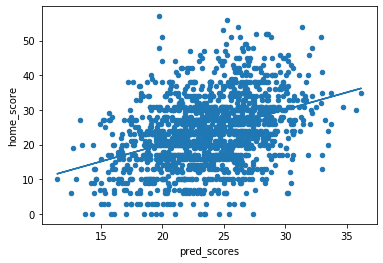

In [381]:
# creates a scatter plot comparing predicted scores with actual scores based on the model
real_home_scores = complete_home[['home_score']]
real_home_scores['pred_scores'] = linreg_home.predict(test_data_home_scaled)
ax = real_home_scores.plot.scatter(x = 'pred_scores', y = 'home_score')
m_home, b_home = np.polyfit(real_home_scores['pred_scores'], real_home_scores['home_score'], 1)
ax.plot(real_home_scores['pred_scores'], m_home*real_home_scores['pred_scores'] + b_home)
print('R^2: ', sklearn.metrics.r2_score(real_home_scores['home_score'], real_home_scores['pred_scores']))
print('home_score = ' + str(round(m_home,2)) + '*pred_score + ' + str(round(b_home,2)))

In [382]:
# Finding multicollinearity in the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [383]:
# lets keep playing with this, might get better or at least more consistent results by combining some predictors

In [384]:
X_df = pd.DataFrame(data = test_data_home_scaled, columns = feature_cols_home)
calc_vif(X_df)

,variables,VIF
0,division_matchup,1.007192
1,home_line,3.206948
2,over_under_line,1.808462
3,home_weighted_win_pct_diff,3.139922
4,home_streak_diff,1.789152
5,home_weighted_last_season_win_diff,1.353396
6,home_fumble_diff_avg,1.075201
7,home_interception_diff_avg,1.100796
8,home_penalty_diff,1.054614
9,home_time_of_possession_diff,1.762819


In [385]:
complete_home.columns

Index(['year', 'week', 'boxscore', 'away_name', 'home_name',
       'division_matchup', 'home_line', 'over_under_line',
       'home_weighted_win_pct_diff', 'home_streak_diff',
       'home_weighted_last_season_win_diff', 'home_fumble_diff_avg',
       'home_interception_diff_avg', 'home_penalty_diff',
       'home_time_of_possession_diff', 'home_first_down_avg',
       'home_fourth_down_conv_pct_avg', 'home_pass_tds_avg',
       'home_rush_tds_avg', 'home_pass_yards_avg', 'home_rush_yards_avg',
       'home_third_down_conv_pct_avg', 'home_sack_diff_avg',
       'home_point_diff_avg', 'home_score'],
      dtype='object')

In [386]:
float_cols = ['home_weighted_win_pct_diff', 'home_streak_diff',
       'home_weighted_last_season_win_diff', 'home_fumble_diff_avg',
       'home_interception_diff_avg', 'home_penalty_diff',
       'home_time_of_possession_diff', 'home_first_down_avg',
       'home_fourth_down_conv_pct_avg', 'home_pass_tds_avg',
       'home_rush_tds_avg', 'home_pass_yards_avg', 'home_rush_yards_avg',
       'home_third_down_conv_pct_avg', 'home_sack_diff_avg',
       'home_point_diff_avg', 'home_score']

In [387]:
from scipy import stats
complete_home_2 = complete_home[(np.abs(stats.zscore(complete_home[float_cols])) < 3).all(axis=1)]

R^2:  -0.08852059716896465


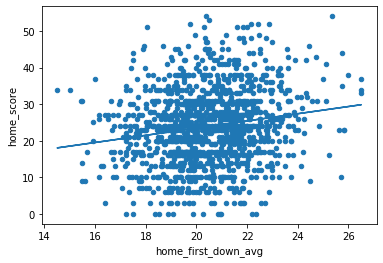

In [388]:


ax = complete_home_2.plot.scatter(x = 'home_first_down_avg', y = 'home_score')
m_home, b_home = np.polyfit(complete_home_2['home_first_down_avg'], complete_home_2['home_score'], 1)
ax.plot(complete_home_2['home_first_down_avg'], m_home*complete_home_2['home_first_down_avg'] + b_home)
print('R^2: ', sklearn.metrics.r2_score(complete_home_2['home_score'], complete_home_2['home_first_down_avg']))

In [389]:
#create test model using vif rows

In [390]:
# same process and documentation for the away team
away_cols = [
       'home_avg_fumbles_lost', 'home_avg_interceptions_thrown',
       
       'home_avg_penalties',
       'home_avg_time_of_possession',
       'home_avg_first_downs_allowed', 'home_def_fourth_down_conversion_pct', 
       'home_avg_fumbles_recovered',
       'home_avg_interceptions_taken', 
                         
       'home_avg_pass_touchdowns_allowed',
       'home_avg_pass_yards_allowed', 'home_avg_rush_touchdowns_allowed',
       'home_avg_rush_yards_allowed', 'home_def_third_down_conversion_pct', 'home_avg_sacks',
    
       'away_avg_first_downs', 'away_fourth_down_conversion_pct', 'away_avg_fumbles_lost',
       'away_avg_interceptions_thrown', 'away_avg_pass_touchdowns',
       'away_avg_pass_yards', 'away_avg_rush_touchdowns',
       'away_avg_rush_yards', 'away_third_down_conversion_pct', 
    
       'away_avg_penalties', 'away_avg_time_of_possession',
       'away_avg_times_sacked', 'away_avg_fumbles_recovered',
       'away_avg_interceptions_taken', 'away_avg_sacks', 
    
       'away_avg_ppg', 'home_avg_papg',
            
    'away_score']

linear_df_away = complete_dataframe[both_cols]

In [391]:
linear_df_away['away_weighted_win_pct_diff'] = (((complete_dataframe['away_wins'] / 
                                      (complete_dataframe['away_wins'] + complete_dataframe['away_losses'])) - 
                                      (complete_dataframe['home_wins'] / 
                                      (complete_dataframe['home_wins'] + complete_dataframe['home_losses']))) * 
                                      (complete_dataframe['week'] / 4))
linear_df_away['away_streak_diff'] = (complete_dataframe['away_streak_before_game'] - 
                                      complete_dataframe['home_streak_before_game'])
linear_df_away['away_weighted_last_season_win_diff'] = ((complete_dataframe['away_last_season_wins'] - 
                                              complete_dataframe['home_last_season_wins']) * 
                                                       ((22 - complete_dataframe['week']) / 4))
linear_df_away['away_fumble_diff_avg'] = ((complete_dataframe['away_avg_fumbles_recovered'] -  
                                     complete_dataframe['away_avg_fumbles_lost']) +
                                     (complete_dataframe['home_avg_fumbles_recovered'] -  
                                     complete_dataframe['home_avg_fumbles_lost'])) / 2
linear_df_away['away_interception_diff_avg'] = ((complete_dataframe['away_avg_interceptions_taken'] -  
                                     complete_dataframe['away_avg_interceptions_thrown']) +
                                     (complete_dataframe['home_avg_interceptions_taken'] -  
                                     complete_dataframe['home_avg_interceptions_thrown'])) / 2
linear_df_away['away_penalty_diff'] = (complete_dataframe['home_avg_penalties'] - 
                                      complete_dataframe['away_avg_penalties'])
linear_df_away['away_time_of_possession_diff'] = (complete_dataframe['away_avg_time_of_possession'] - 
                                                  complete_dataframe['home_avg_time_of_possession'])
linear_df_away['away_first_down_avg'] = (complete_dataframe['away_avg_first_downs'] + 
                                           complete_dataframe['home_avg_first_downs_allowed']) / 2
linear_df_away['away_fourth_down_conv_pct_avg'] = (complete_dataframe['away_fourth_down_conversion_pct'] + 
                                           complete_dataframe['home_def_fourth_down_conversion_pct']) / 2
linear_df_away['away_pass_tds_avg'] = (complete_dataframe['away_avg_pass_touchdowns'] + 
                                           complete_dataframe['home_avg_pass_touchdowns_allowed']) / 2
linear_df_away['away_rush_tds_avg'] = (complete_dataframe['away_avg_rush_touchdowns'] + 
                                           complete_dataframe['home_avg_rush_touchdowns_allowed']) / 2
linear_df_away['away_pass_yards_avg'] = (complete_dataframe['away_avg_pass_yards'] + 
                                           complete_dataframe['home_avg_pass_yards_allowed']) / 2
linear_df_away['away_rush_yards_avg'] = (complete_dataframe['away_avg_rush_yards'] + 
                                           complete_dataframe['home_avg_rush_yards_allowed']) / 2
linear_df_away['away_third_down_conv_pct_avg'] = (complete_dataframe['away_third_down_conversion_pct'] + 
                                           complete_dataframe['home_def_third_down_conversion_pct']) / 2
linear_df_away['away_sack_diff_avg'] = ((complete_dataframe['away_avg_sacks'] -  
                                     complete_dataframe['away_avg_times_sacked']) +
                                     (complete_dataframe['home_avg_sacks'] -  
                                     complete_dataframe['home_avg_times_sacked'])) / 2
linear_df_away['away_point_diff_avg'] = (complete_dataframe['away_avg_ppg'] + 
                                           complete_dataframe['home_avg_papg']) / 2
linear_df_away['away_score'] = complete_dataframe['away_score']
linear_df_away

,year,week,boxscore,away_name,home_name,division_matchup,home_line,over_under_line,away_weighted_win_pct_diff,away_streak_diff,...,away_first_down_avg,away_fourth_down_conv_pct_avg,away_pass_tds_avg,away_rush_tds_avg,away_pass_yards_avg,away_rush_yards_avg,away_third_down_conv_pct_avg,away_sack_diff_avg,away_point_diff_avg,away_score
16,2015,2,201509170kan,Denver Broncos,Kansas City Chiefs,1,-3.0,43.5,0,0,...,20.000000,NaN,1.000000,0.000000,254.500000,83.500000,0.329365,0.500000,19.500000,31
17,2015,2,201509200chi,Arizona Cardinals,Chicago Bears,0,1.5,44.5,0.5,2,...,23.000000,NaN,3.000000,1.000000,248.000000,126.500000,0.550000,0.000000,31.000000,48
18,2015,2,201509200car,Houston Texans,Carolina Panthers,0,-3.0,40.5,-0.5,-2,...,21.000000,0.250000,1.500000,0.000000,258.500000,97.000000,0.232143,0.000000,14.500000,17
19,2015,2,201509200buf,New England Patriots,Buffalo Bills,1,0.0,45.0,0,0,...,24.500000,NaN,3.000000,0.000000,265.500000,72.000000,0.584848,1.500000,21.000000,40
20,2015,2,201509200pit,San Francisco 49ers,Pittsburgh Steelers,0,-5.0,44.0,0.5,2,...,25.500000,NaN,2.000000,1.000000,226.500000,155.000000,0.526515,1.500000,24.000000,18
21,2015,2,201509200nyg,Atlanta Falcons,New York Giants,0,-2.0,51.0,0.5,2,...,24.000000,NaN,2.500000,0.000000,327.000000,92.500000,0.415584,-1.000000,26.500000,24
22,2015,2,201509200nor,Tampa Bay Buccaneers,New Orleans Saints,1,-10.5,48.5,0,0,...,20.500000,NaN,2.500000,0.500000,258.500000,106.000000,0.357143,-2.000000,22.500000,26
23,2015,2,201509200cle,Tennessee Titans,Cleveland Browns,0,-2.5,41.5,0.5,2,...,19.000000,NaN,3.000000,1.500000,194.000000,139.000000,0.491453,-0.500000,36.500000,14
24,2015,2,201509200was,St. Louis Rams,Washington Redskins,0,3.0,42.0,0.5,2,...,19.000000,NaN,1.000000,1.000000,261.500000,75.000000,0.481061,3.000000,25.500000,10
25,2015,2,201509200min,Detroit Lions,Minnesota Vikings,1,-3.0,44.0,0,0,...,20.500000,NaN,1.000000,1.500000,205.500000,149.500000,0.358333,-1.500000,24.000000,16


In [392]:
complete_away = linear_df_away[~linear_df_away['home_line'].isnull()]

In [393]:
complete_away = complete_away.fillna(0)

In [394]:
complete_away

,year,week,boxscore,away_name,home_name,division_matchup,home_line,over_under_line,away_weighted_win_pct_diff,away_streak_diff,...,away_first_down_avg,away_fourth_down_conv_pct_avg,away_pass_tds_avg,away_rush_tds_avg,away_pass_yards_avg,away_rush_yards_avg,away_third_down_conv_pct_avg,away_sack_diff_avg,away_point_diff_avg,away_score
16,2015,2,201509170kan,Denver Broncos,Kansas City Chiefs,1,-3.0,43.5,0.000000,0,...,20.000000,0.000000,1.000000,0.000000,254.500000,83.500000,0.329365,0.500000,19.500000,31
17,2015,2,201509200chi,Arizona Cardinals,Chicago Bears,0,1.5,44.5,0.500000,2,...,23.000000,0.000000,3.000000,1.000000,248.000000,126.500000,0.550000,0.000000,31.000000,48
18,2015,2,201509200car,Houston Texans,Carolina Panthers,0,-3.0,40.5,-0.500000,-2,...,21.000000,0.250000,1.500000,0.000000,258.500000,97.000000,0.232143,0.000000,14.500000,17
19,2015,2,201509200buf,New England Patriots,Buffalo Bills,1,0.0,45.0,0.000000,0,...,24.500000,0.000000,3.000000,0.000000,265.500000,72.000000,0.584848,1.500000,21.000000,40
20,2015,2,201509200pit,San Francisco 49ers,Pittsburgh Steelers,0,-5.0,44.0,0.500000,2,...,25.500000,0.000000,2.000000,1.000000,226.500000,155.000000,0.526515,1.500000,24.000000,18
21,2015,2,201509200nyg,Atlanta Falcons,New York Giants,0,-2.0,51.0,0.500000,2,...,24.000000,0.000000,2.500000,0.000000,327.000000,92.500000,0.415584,-1.000000,26.500000,24
22,2015,2,201509200nor,Tampa Bay Buccaneers,New Orleans Saints,1,-10.5,48.5,0.000000,0,...,20.500000,0.000000,2.500000,0.500000,258.500000,106.000000,0.357143,-2.000000,22.500000,26
23,2015,2,201509200cle,Tennessee Titans,Cleveland Browns,0,-2.5,41.5,0.500000,2,...,19.000000,0.000000,3.000000,1.500000,194.000000,139.000000,0.491453,-0.500000,36.500000,14
24,2015,2,201509200was,St. Louis Rams,Washington Redskins,0,3.0,42.0,0.500000,2,...,19.000000,0.000000,1.000000,1.000000,261.500000,75.000000,0.481061,3.000000,25.500000,10
25,2015,2,201509200min,Detroit Lions,Minnesota Vikings,1,-3.0,44.0,0.000000,0,...,20.500000,0.000000,1.000000,1.500000,205.500000,149.500000,0.358333,-1.500000,24.000000,16


In [395]:
linear_df_away.columns

Index(['year', 'week', 'boxscore', 'away_name', 'home_name',
       'division_matchup', 'home_line', 'over_under_line',
       'away_weighted_win_pct_diff', 'away_streak_diff',
       'away_weighted_last_season_win_diff', 'away_fumble_diff_avg',
       'away_interception_diff_avg', 'away_penalty_diff',
       'away_time_of_possession_diff', 'away_first_down_avg',
       'away_fourth_down_conv_pct_avg', 'away_pass_tds_avg',
       'away_rush_tds_avg', 'away_pass_yards_avg', 'away_rush_yards_avg',
       'away_third_down_conv_pct_avg', 'away_sack_diff_avg',
       'away_point_diff_avg', 'away_score'],
      dtype='object')

In [412]:
#Creating the model
feature_cols_away = ['division_matchup', 'home_line', 'over_under_line',
       'away_weighted_win_pct_diff', 'away_streak_diff',
       'away_weighted_last_season_win_diff', 'away_fumble_diff_avg',
       'away_interception_diff_avg', 'away_penalty_diff',
       'away_time_of_possession_diff', 'away_first_down_avg',
       'away_fourth_down_conv_pct_avg', 'away_pass_tds_avg',
       'away_rush_tds_avg', 'away_pass_yards_avg', 'away_rush_yards_avg',
       'away_third_down_conv_pct_avg', 'away_sack_diff_avg',
       'away_point_diff_avg']
test_data_away = complete_away[feature_cols_away]
scaler_away = StandardScaler().fit(test_data_away)
test_data_away_scaled = scaler_away.transform(test_data_away)
X_train, X_test, y_train, y_test = train_test_split(test_data_away_scaled, complete_away.away_score, test_size=0.2)

In [413]:
linreg_away = LinearRegression()


linreg_away.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [414]:
linreg_away.score(X_train, y_train)

0.14200189085031933

In [415]:
linreg_away.score(X_test, y_test)

0.11310157432363688

In [416]:
coef_dict_away = {}
for coef, feat in zip(linreg_away.coef_,feature_cols_away):
    coef_dict_away[feat] = coef
    
coef_dict_away

{'division_matchup': -0.08947701031761622,
 'home_line': 1.9697967727523016,
 'over_under_line': 2.3787422754790666,
 'away_weighted_win_pct_diff': 0.6851421581870691,
 'away_streak_diff': -0.07370303155738625,
 'away_weighted_last_season_win_diff': 0.1742085144612081,
 'away_fumble_diff_avg': 0.1835027136425896,
 'away_interception_diff_avg': 0.18280201188290865,
 'away_penalty_diff': 0.09197429904075562,
 'away_time_of_possession_diff': -0.21204425909874122,
 'away_first_down_avg': 0.7359360474179306,
 'away_fourth_down_conv_pct_avg': 0.24426573602880236,
 'away_pass_tds_avg': -0.9391779316991582,
 'away_rush_tds_avg': -1.1270278651068804,
 'away_pass_yards_avg': -0.12114261774535023,
 'away_rush_yards_avg': 0.9869190665149283,
 'away_third_down_conv_pct_avg': -0.040474561687780825,
 'away_sack_diff_avg': -0.685897553678508,
 'away_point_diff_avg': 0.30943345297610075}

In [417]:
to_train = sm.add_constant(np.asarray(X_train))
p_away = OLS(np.asarray(y_train),to_train).fit()
summ_away = p_away.summary2()
summ_away = summ_away.tables[1]
summ_away.index = ['const'] + feature_cols_away
summ_away = round(summ_away, 4)
summ_away
summ_away.sort_values('P>|t|', ascending = True)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,22.2469,0.2554,87.1023,0.0000,21.7459,22.7480
home_line,1.9698,0.4792,4.1103,0.0000,1.0296,2.9100
over_under_line,2.3787,0.3584,6.6371,0.0000,1.6756,3.0819
away_sack_diff_avg,-0.6859,0.2765,-2.4809,0.0132,-1.2283,-0.1435
away_rush_tds_avg,-1.1270,0.4579,-2.4612,0.0140,-2.0254,-0.2286
away_rush_yards_avg,0.9869,0.4149,2.3787,0.0175,0.1729,1.8009
away_pass_tds_avg,-0.9392,0.5405,-1.7377,0.0825,-1.9995,0.1212
away_weighted_win_pct_diff,0.6851,0.4510,1.5191,0.1290,-0.1997,1.5700
away_first_down_avg,0.7359,0.5634,1.3062,0.1917,-0.3694,1.8413
away_fourth_down_conv_pct_avg,0.2443,0.2712,0.9008,0.3678,-0.2877,0.7762


R^2:  0.13535737097239042
away_score = 1.0*pred_score + -0.03


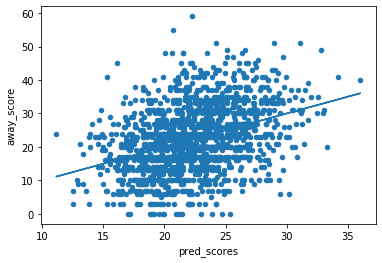

In [418]:
real_away_scores = complete_away[['away_score']]
real_away_scores['pred_scores'] = linreg_away.predict(test_data_away_scaled)
ax = real_away_scores.plot.scatter(x = 'pred_scores', y = 'away_score')
m_away, b_away = np.polyfit(real_away_scores['pred_scores'], real_away_scores['away_score'], 1)
ax.plot(real_away_scores['pred_scores'], m_away*real_away_scores['pred_scores'] + b_away)
print('R^2: ', sklearn.metrics.r2_score(real_away_scores['away_score'], real_away_scores['pred_scores']))
print('away_score = ' + str(round(m_away,2)) + '*pred_score + ' + str(round(b_away,2)))

In [420]:
# Using this funciton, you can input a game and information to predict the scores for both teams, the predicted 
# spread, the predicted total score, and the probability the home team wins
def predScores(home, away, year, week, home_line, over_under) :
    home_data = findAvgStats(year, week, 'NA', home, atts, 'home')
    home_df = pd.DataFrame(columns = home_data.index)
    home_df = home_df.append(home_data, ignore_index = True)
    away_data = findAvgStats(year, week, 'NA', away, atts, 'away')
    away_df = pd.DataFrame(columns = away_data.index)
    away_df = away_df.append(away_data, ignore_index = True)
    total_df = home_df.merge(away_df, on = ['year', 'week', 'boxscore'], how = 'inner')
    
    total_df['away_fourth_down_conversion_pct'] = (total_df['away_avg_fourth_down_conversions'] / 
                                                 total_df['away_avg_fourth_down_attempts'])
    total_df['away_third_down_conversion_pct'] = (total_df['away_avg_third_down_conversions'] / 
                                                     total_df['away_avg_third_down_attempts'])
    total_df['away_def_fourth_down_conversion_pct'] = (total_df['away_avg_def_fourth_down_conversions'] / 
                                                     total_df['away_avg_def_fourth_down_attempts'])
    total_df['away_def_third_down_conversion_pct'] = (total_df['away_avg_def_third_down_conversions'] / 
                                                     total_df['away_avg_def_third_down_attempts'])

    total_df['home_fourth_down_conversion_pct'] = (total_df['home_avg_fourth_down_conversions'] / 
                                                     total_df['home_avg_fourth_down_attempts'])
    total_df['home_third_down_conversion_pct'] = (total_df['home_avg_third_down_conversions'] / 
                                                     total_df['home_avg_third_down_attempts'])
    total_df['home_def_fourth_down_conversion_pct'] = (total_df['home_avg_def_fourth_down_conversions'] / 
                                                     total_df['home_avg_def_fourth_down_attempts'])
    total_df['home_def_third_down_conversion_pct'] = (total_df['home_avg_def_third_down_conversions'] / 
                                                     total_df['home_avg_def_third_down_attempts'])
    
    total_df = total_df.merge(games_and_lines, on = ['year', 'week'], how = 'inner')
    total_df = total_df[(total_df['home_name'] == home) & (total_df['away_name'] == away)]
    total_df['home_line'] = home_line
    total_df['over_under_line'] = over_under
    
    #home-win operations
    total_df['weighted_win_pct_diff'] = (((total_df['home_wins'] / 
                                          (total_df['home_wins'] + total_df['home_losses'])) - 
                                          (total_df['away_wins'] / 
                                          (total_df['away_wins'] + total_df['away_losses']))) * 
                                          (total_df['week'] / 4))
    total_df['streak_diff'] = (total_df['home_streak_before_game'] - 
                                         total_df['away_streak_before_game'])
    total_df['weighted_last_season_win_diff'] = ((total_df['home_last_season_wins'] - 
                                              total_df['away_last_season_wins']) * 
                                                       ((17 - total_df['week']) / 4))
    total_df['first_down_diff'] = ((total_df['home_avg_first_downs'] - 
                                                  total_df['home_avg_first_downs_allowed']) - 
                                                 (total_df['away_avg_first_downs'] - 
                                                  total_df['away_avg_first_downs_allowed']))
    total_df['fourth_down_conv_diff'] = ((total_df['home_fourth_down_conversion_pct'] - 
                                                  total_df['home_def_fourth_down_conversion_pct']) - 
                                                 (total_df['away_fourth_down_conversion_pct'] - 
                                                  total_df['away_def_fourth_down_conversion_pct']))
    total_df['third_down_conv_diff'] = ((total_df['home_third_down_conversion_pct'] - 
                                                  total_df['home_def_third_down_conversion_pct']) - 
                                                 (total_df['away_third_down_conversion_pct'] - 
                                                  total_df['away_def_third_down_conversion_pct']))
    total_df['fumble_diff'] = ((total_df['home_avg_fumbles_recovered'] - 
                                                  total_df['home_avg_fumbles_lost']) - 
                                                 (total_df['away_avg_fumbles_recovered'] - 
                                                  total_df['away_avg_fumbles_lost']))
    total_df['interception_diff'] = ((total_df['home_avg_interceptions_taken'] - 
                                          total_df['home_avg_interceptions_thrown']) - 
                                          (total_df['away_avg_interceptions_taken'] - 
                                          total_df['away_avg_interceptions_thrown']))
    total_df['pass_td_diff'] = ((total_df['home_avg_pass_touchdowns'] - 
                                          total_df['home_avg_pass_touchdowns_allowed']) - 
                                          (total_df['away_avg_pass_touchdowns'] - 
                                          total_df['away_avg_pass_touchdowns_allowed']))
    total_df['rush_td_diff'] = ((total_df['home_avg_rush_touchdowns'] - 
                                          total_df['home_avg_rush_touchdowns_allowed']) - 
                                          (total_df['away_avg_rush_touchdowns'] - 
                                          total_df['away_avg_rush_touchdowns_allowed']))
    total_df['pass_yards_diff'] = ((total_df['home_avg_pass_yards'] - 
                                          total_df['home_avg_pass_yards_allowed']) - 
                                          (total_df['away_avg_pass_yards'] - 
                                          total_df['away_avg_pass_yards_allowed']))
    total_df['rush_yards_diff'] = ((total_df['home_avg_rush_yards'] - 
                                          total_df['home_avg_rush_yards_allowed']) - 
                                          (total_df['away_avg_rush_yards'] - 
                                          total_df['away_avg_rush_yards_allowed']))
    total_df['penalties_diff'] = (total_df['home_avg_penalties'] - 
                                            total_df['away_avg_penalties'])
    total_df['time_of_poss_diff'] = (total_df['home_avg_time_of_possession'] - 
                                            total_df['away_avg_time_of_possession'])
    total_df['sack_diff'] = ((total_df['home_avg_sacks'] - 
                                          total_df['home_avg_times_sacked']) - 
                                          (total_df['away_avg_sacks'] - 
                                          total_df['away_avg_times_sacked']))
    total_df['points_diff'] = ((total_df['home_avg_ppg'] - 
                                          total_df['home_avg_papg']) - 
                                          (total_df['away_avg_ppg'] - 
                                          total_df['away_avg_papg']))
    
    #home operations
    total_df['home_weighted_win_pct_diff'] = (((total_df['home_wins'] / 
                                          (total_df['home_wins'] + total_df['home_losses'])) - 
                                          (total_df['away_wins'] / 
                                          (total_df['away_wins'] + total_df['away_losses']))) * 
                                          (total_df['week'] / 4))
    total_df['home_streak_diff'] = (total_df['home_streak_before_game'] - 
                                          total_df['away_streak_before_game'])
    total_df['home_weighted_last_season_win_diff'] = ((total_df['home_last_season_wins'] - 
                                              total_df['away_last_season_wins']) * 
                                                       ((17 - total_df['week']) / 4))
    total_df['home_fumble_diff_avg'] = ((total_df['home_avg_fumbles_recovered'] -  
                                         total_df['home_avg_fumbles_lost']) +
                                         (total_df['away_avg_fumbles_recovered'] -  
                                         total_df['away_avg_fumbles_lost'])) / 2
    total_df['home_interception_diff_avg'] = ((total_df['home_avg_interceptions_taken'] -  
                                         total_df['home_avg_interceptions_thrown']) +
                                         (total_df['away_avg_interceptions_taken'] -  
                                         total_df['away_avg_interceptions_thrown'])) / 2
    total_df['home_penalty_diff'] = (total_df['away_avg_penalties'] - 
                                          total_df['home_avg_penalties'])
    total_df['home_time_of_possession_diff'] = (total_df['home_avg_time_of_possession'] - 
                                                      total_df['away_avg_time_of_possession'])
    total_df['home_first_down_avg'] = (total_df['home_avg_first_downs'] + 
                                               total_df['away_avg_first_downs_allowed']) / 2
    total_df['home_fourth_down_conv_pct_avg'] = (total_df['home_fourth_down_conversion_pct'] + 
                                               total_df['away_def_fourth_down_conversion_pct']) / 2
    total_df['home_pass_tds_avg'] = (total_df['home_avg_pass_touchdowns'] + 
                                               total_df['away_avg_pass_touchdowns_allowed']) / 2
    total_df['home_rush_tds_avg'] = (total_df['home_avg_rush_touchdowns'] + 
                                               total_df['away_avg_rush_touchdowns_allowed']) / 2
    total_df['home_pass_yards_avg'] = (total_df['home_avg_pass_yards'] + 
                                               total_df['away_avg_pass_yards_allowed']) / 2
    total_df['home_rush_yards_avg'] = (total_df['home_avg_rush_yards'] + 
                                               total_df['away_avg_rush_yards_allowed']) / 2
    total_df['home_third_down_conv_pct_avg'] = (total_df['home_third_down_conversion_pct'] + 
                                               total_df['away_def_third_down_conversion_pct']) / 2
    total_df['home_sack_diff_avg'] = ((total_df['home_avg_sacks'] -  
                                         total_df['home_avg_times_sacked']) +
                                         (total_df['away_avg_sacks'] -  
                                         total_df['away_avg_times_sacked'])) / 2
    total_df['home_point_diff_avg'] = (total_df['home_avg_ppg'] + 
                                               total_df['away_avg_papg']) / 2
    
    #away operations
    total_df['away_weighted_win_pct_diff'] = (((total_df['away_wins'] / 
                                          (total_df['away_wins'] + total_df['away_losses'])) - 
                                          (total_df['home_wins'] / 
                                          (total_df['home_wins'] + total_df['home_losses']))) * 
                                          (total_df['week'] / 4))
    total_df['away_streak_diff'] = (total_df['away_streak_before_game'] - 
                                          total_df['home_streak_before_game'])
    total_df['away_weighted_last_season_win_diff'] = ((total_df['away_last_season_wins'] - 
                                              total_df['home_last_season_wins']) * 
                                                       ((17 - total_df['week']) / 4))
    total_df['away_fumble_diff_avg'] = ((total_df['away_avg_fumbles_recovered'] -  
                                         total_df['away_avg_fumbles_lost']) +
                                         (total_df['home_avg_fumbles_recovered'] -  
                                         total_df['home_avg_fumbles_lost'])) / 2
    total_df['away_interception_diff_avg'] = ((total_df['away_avg_interceptions_taken'] -  
                                         total_df['away_avg_interceptions_thrown']) +
                                         (total_df['home_avg_interceptions_taken'] -  
                                         total_df['home_avg_interceptions_thrown'])) / 2
    total_df['away_penalty_diff'] = (total_df['home_avg_penalties'] - 
                                          total_df['away_avg_penalties'])
    total_df['away_time_of_possession_diff'] = (total_df['away_avg_time_of_possession'] - 
                                                      total_df['home_avg_time_of_possession'])
    total_df['away_first_down_avg'] = (total_df['away_avg_first_downs'] + 
                                               total_df['home_avg_first_downs_allowed']) / 2
    total_df['away_fourth_down_conv_pct_avg'] = (total_df['away_fourth_down_conversion_pct'] + 
                                               total_df['home_def_fourth_down_conversion_pct']) / 2
    total_df['away_pass_tds_avg'] = (total_df['away_avg_pass_touchdowns'] + 
                                               total_df['home_avg_pass_touchdowns_allowed']) / 2
    total_df['away_rush_tds_avg'] = (total_df['away_avg_rush_touchdowns'] + 
                                               total_df['home_avg_rush_touchdowns_allowed']) / 2
    total_df['away_pass_yards_avg'] = (total_df['away_avg_pass_yards'] + 
                                               total_df['home_avg_pass_yards_allowed']) / 2
    total_df['away_rush_yards_avg'] = (total_df['away_avg_rush_yards'] + 
                                               total_df['home_avg_rush_yards_allowed']) / 2
    total_df['away_third_down_conv_pct_avg'] = (total_df['away_third_down_conversion_pct'] + 
                                               total_df['home_def_third_down_conversion_pct']) / 2
    total_df['away_sack_diff_avg'] = ((total_df['away_avg_sacks'] -  
                                         total_df['away_avg_times_sacked']) +
                                         (total_df['home_avg_sacks'] -  
                                         total_df['home_avg_times_sacked'])) / 2
    total_df['away_point_diff_avg'] = (total_df['away_avg_ppg'] + 
                                               total_df['home_avg_papg']) / 2
    total_df = total_df.fillna(0)
    linear_df_home = total_df[feature_cols_home]
    linear_df_away = total_df[feature_cols_away]
    home_score = linreg_home.predict(scaler_home.transform(linear_df_home[feature_cols_home].values))
    away_score = linreg_away.predict(scaler_away.transform(linear_df_away[feature_cols_away].values))
    home_win_prob = logreg.predict_proba(scaler_log.transform(total_df[feature_cols_log]))[0][1]
    
    first, *middle, home_title = home.split()
    first, *middle, away_title = away.split()
    return (round(home_score[0], 2),
            round(away_score[0], 2),
            round(home_win_prob, 2),
            float(home_line),
            float(over_under),
            home_title,
            away_title)

In [421]:
def predScoresString(home, away, year, week, home_l, o_u):
    home_score, away_score, home_win_prob, home_line, over_under, home_team, away_team = predScores(home, away, 
                                                                                                    year, week, 
                                                                                                    home_l, o_u)
    total_string = str(home_team + ': ' + str(home_score) + ' | ' + away_team + ': ' + str(away_score) + 
                       ' | ' + home_team + ' Cover Spread: ' + str(home_score + home_line > away_score) + 
                      '(' + str(home_l) + ') | Over Hits: ' + str(away_score + home_score > over_under) + '(' + 
                       str(over_under) + ') | ' + home_team + ' Win Prob: ' + str(home_win_prob))
    return total_string

In [422]:
# Below are tests on games that were not used in training the model

In [423]:
# Actual: HOU - 30, JAX - 14
# Home Covered: True
# Over: False
predScoresString('Houston Texans', 'Jacksonville Jaguars', 2020, 5, -5.5, 54.5)

'Texans: 26.93 | Jaguars: 28.62 | Texans Cover Spread: False(-5.5) | Over Hits: True(54.5) | Texans Win Prob: 0.65'

In [424]:
# Actual: CLE - 32, IND - 23
# Home Covered: True
# Over: True
predScoresString('Cleveland Browns', 'Indianapolis Colts', 2020, 5, -1, 48)

'Browns: 24.31 | Colts: 23.94 | Browns Cover Spread: False(-1) | Over Hits: True(48.0) | Browns Win Prob: 0.55'

In [425]:
# Actual: DAL - 37, NYG - 34
# Home Covered: False
# Over: True
predScoresString('Dallas Cowboys', 'New York Giants', 2020, 5, -7.5, 52.5)

'Cowboys: 28.17 | Giants: 25.44 | Cowboys Cover Spread: False(-7.5) | Over Hits: True(52.5) | Cowboys Win Prob: 0.64'

In [426]:
# Actual: SEA - 27, MIN - 26
# Home Covered: False
# Over: False
predScoresString('Seattle Seahawks', 'Minnesota Vikings', 2020, 5, -6.5, 56)

'Seahawks: 30.35 | Vikings: 25.98 | Seahawks Cover Spread: False(-6.5) | Over Hits: True(56.0) | Seahawks Win Prob: 0.76'

In [427]:
# Actual: CAR - 16, CHI - 23
# Home Covered: False
# Over: False
predScoresString('Carolina Panthers', 'Chicago Bears', 2020, 6, -2.5, 48.5)

'Panthers: 25.87 | Bears: 24.94 | Panthers Cover Spread: False(-2.5) | Over Hits: True(48.5) | Panthers Win Prob: 0.53'

In [428]:
# Actual: NO - 30, LAC - 27
# Home Covered: False
# Over: True
predScoresString('New Orleans Saints', 'Los Angeles Chargers', 2020, 5, -6.5, 50)

'Saints: 27.37 | Chargers: 22.21 | Saints Cover Spread: False(-6.5) | Over Hits: False(50.0) | Saints Win Prob: 0.74'

In [429]:
# Actual: TEN - 42, BUF - 16
# Home Covered: True
# Over: True
predScoresString('Tennessee Titans', 'Buffalo Bills', 2020, 5, 3.5, 51.5)

'Titans: 22.63 | Bills: 27.35 | Titans Cover Spread: False(3.5) | Over Hits: False(51.5) | Titans Win Prob: 0.39'

In [430]:
# Actual: DAL - 10, ARI - 38
# Home Covered: False
# Over: False
predScoresString('Dallas Cowboys', 'Arizona Cardinals', 2020, 6, -1, 55)

'Cowboys: 26.71 | Cardinals: 28.38 | Cowboys Cover Spread: False(-1) | Over Hits: True(55.0) | Cowboys Win Prob: 0.46'

In [431]:
# Actual: LAR - , CHI - 
# Home Covered: 
# Over: 
predScoresString('Los Angeles Rams', 'Chicago Bears', 2020, 7, -5.5, 46)

'Rams: 26.34 | Bears: 20.37 | Rams Cover Spread: True(-5.5) | Over Hits: True(46.0) | Rams Win Prob: 0.66'

In [432]:
# Actual: ARI - 37, SEA - 34
# Home Covered: True
# Over: True
predScoresString('Arizona Cardinals', 'Seattle Seahawks', 2020, 7, 3.5, 56)

'Cardinals: 23.63 | Seahawks: 30.89 | Cardinals Cover Spread: False(3.5) | Over Hits: False(56.0) | Cardinals Win Prob: 0.3'

In [433]:
# Actual: DEN - 16, KC - 43
# Home Covered: False
# Over: True
predScoresString('Denver Broncos', 'Kansas City Chiefs', 2020, 7, 10, 47)

'Broncos: 16.04 | Chiefs: 28.3 | Broncos Cover Spread: False(10) | Over Hits: False(47.0) | Broncos Win Prob: 0.18'

In [434]:
# Actual: NYJ - 10, BUF - 18
# Home Covered: True
# Over: False
predScoresString('New York Jets', 'Buffalo Bills', 2020, 7, 13.5, 45.5)

'Jets: 12.65 | Bills: 28.15 | Jets Cover Spread: False(13.5) | Over Hits: False(45.5) | Jets Win Prob: 0.13'

In [435]:
# Actual: NO - 27, CAR - 24
# Home Covered: False
# Over: Push
predScoresString('New Orleans Saints', 'Carolina Panthers', 2020, 7, -7.5, 51)

'Saints: 27.08 | Panthers: 22.49 | Saints Cover Spread: False(-7.5) | Over Hits: False(51.0) | Saints Win Prob: 0.77'

In [436]:
# Actual: CIN - 34, CLE - 37
# Home Covered: True
# Over: True
predScoresString('Cincinnati Bengals', 'Cleveland Browns', 2020, 7, 3.5, 50.5)

'Bengals: 21.75 | Browns: 30.2 | Bengals Cover Spread: False(3.5) | Over Hits: True(50.5) | Bengals Win Prob: 0.31'

In [437]:
# Actual: LV - 20, TB - 45
# Home Covered: False
# Over: True
predScoresString('Las Vegas Raiders', 'Tampa Bay Buccaneers', 2020, 7, 3, 53)

'Raiders: 23.81 | Buccaneers: 26.02 | Raiders Cover Spread: True(3) | Over Hits: False(53.0) | Raiders Win Prob: 0.4'

In [438]:
# Actual: HOU - 20, GB - 35
# Home Covered: False
# Over: Push
predScoresString('Houston Texans', 'Green Bay Packers', 2020, 7, 2.5, 55)

'Texans: 23.71 | Packers: 31.32 | Texans Cover Spread: False(2.5) | Over Hits: True(55.0) | Texans Win Prob: 0.31'

In [439]:
# Actual: CAR - , HOU - 
# Home Covered: 
# Over: 
predScoresString('Carolina Panthers', 'Atlanta Falcons', 2020, 8, -1, 52)

'Panthers: 24.33 | Falcons: 26.51 | Panthers Cover Spread: False(-1) | Over Hits: False(52.0) | Panthers Win Prob: 0.46'

In [440]:
from bs4 import BeautifulSoup
from selenium import webdriver

In [441]:
URL = 'https://sports.yahoo.com/nfl/odds/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAGqOqkNw0TfIjM6pg5lPvmVSlo91XDyovGm7gtPJBjgQkj6PaxtW1B3BI_c67bB7cnu7ByiMHl551sHnaEdOw4gBOi62CT0QFEgFWbZqlATw-W0zlGpmzs6qJm76eSP2XSa2h7yDIH5qIJdIKb_cjJetj8NvvKqPAT4xYNCDYffn'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
games = soup.find(class_ = 'bet-packs-wrapper')

games_array = games.find_all('div', class_='PREGAME sixpack W(100%) Mb(20px) D(f) Bd(border-light) Bdrs(12px)')
current_games_df = pd.DataFrame(columns = ['home_name', 'away_name', 
                                           'home_line', 'over_under_line'])

game = games_array[0]
game
away = game.find('div', class_= 'Fz(14px) Lh(30px) C($c-fuji-grey-m) Ell sixpack-away-team Mb(16px)')
away_name = away.find('span', class_= 'Fw(600) Pend(4px)').text

home = game.find('div', class_= 'Fz(14px) Lh(30px) C($c-fuji-grey-m) Ell sixpack-home-team')
home_name = home.find('span', class_= 'Fw(600) Pend(4px)').text

spreads = game.find_all('div', class_='Fxg(1) Flxb(0)')
lines = spreads[1]
o_u = spreads[2]
line = lines.find(class_ = 'YahooSans-Semibold Bdrs(22px) Fw(600) Bxz(bb) C($c-fuji-grey-m) Whs(nw) Bgc(#fff) H(32px) W(120px) Mstart(12px) Fz(14px)')
line_num = float(line.find_all()[1].text)

o_u_nums = o_u.find(class_ = 'YahooSans-Semibold Bdrs(22px) Fw(600) Bxz(bb) C($c-fuji-grey-m) Whs(nw) Bgc(#fff) H(32px) W(120px) Mstart(12px) Fz(14px)')
o_u_num = float((o_u_nums.find_all()[1].text).split(' ')[1])

o_u_num



49.5

In [442]:
games_array

[<div class="PREGAME sixpack W(100%) Mb(20px) D(f) Bd(border-light) Bdrs(12px)" data-reactid="70"><div class="D(f) H(100%) W(100%) Mx(a) Px(20px) smartphone_Px(0px) Mb(4px)" data-reactid="71"><div class="Fxg(4) Flxb(0) Miw(200px) Maw(300px) Ell Pt(20px)" data-reactid="72"><div class="smartphone_Mb(16px) H(16px) Ell Mb(20px)" data-reactid="73"><span class="Fz(14px) smartphone_Fz(12px) C(#828c93)" data-reactid="74"><span class="V(h)" data-reactid="75"></span></span></div><div class="Fz(14px) Lh(30px) C($c-fuji-grey-m) Ell sixpack-away-team Mb(16px)" data-reactid="76"><div class="svg-wrapper Pend(16px) smartphone_Pend(10px) D(ib) H(30px) W(30px) Va(m) D(n) D(ib)--medPhone" data-reactid="77"><svg class="" data-reactid="78" height="30" viewbox="0 0 180 180" width="30" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><g data-reactid="79" fill="none" fill-rule="evenodd" id="NFL" stroke="none" stroke-width="1"><g data-reactid="80" fill="#013369" id="Group" transfor

In [456]:
def getCurWeekSpreads():
    URL = 'https://sports.yahoo.com/nfl/odds/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAGqOqkNw0TfIjM6pg5lPvmVSlo91XDyovGm7gtPJBjgQkj6PaxtW1B3BI_c67bB7cnu7ByiMHl551sHnaEdOw4gBOi62CT0QFEgFWbZqlATw-W0zlGpmzs6qJm76eSP2XSa2h7yDIH5qIJdIKb_cjJetj8NvvKqPAT4xYNCDYffn'
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    games = soup.find(class_ = 'bet-packs-wrapper')

    games_array = games.find_all('div', class_='PREGAME sixpack W(100%) Mb(20px) D(f) Bd(border-light) Bdrs(12px)')
    current_games_df = pd.DataFrame(columns = ['home_name', 'away_name', 
                                               'home_line', 'over_under_line'])

    for game in games_array:
        away = game.find('div', class_= 'Fz(14px) Lh(30px) C($c-fuji-grey-m) Ell sixpack-away-team Mb(16px)')
        away_name = (away.find('span', class_= 'Fw(600) Pend(4px)').text)

        home = game.find('div', class_= 'Fz(14px) Lh(30px) C($c-fuji-grey-m) Ell sixpack-home-team')
        home_name = home.find('span', class_= 'Fw(600) Pend(4px)').text

        spreads = game.find_all('div', class_='Fxg(1) Flxb(0)')
        lines = spreads[1]
        o_u = spreads[2]
        line = lines.find_all(class_ = 'YahooSans-Semibold Bdrs(22px) Fw(600) Bxz(bb) C($c-fuji-grey-m) Whs(nw) Bgc(#fff) H(32px) W(120px) Mstart(12px) Fz(14px)')[1]
        line_num = float(line.find_all()[1].text)

        o_u_nums = o_u.find(class_ = 'YahooSans-Semibold Bdrs(22px) Fw(600) Bxz(bb) C($c-fuji-grey-m) Whs(nw) Bgc(#fff) H(32px) W(120px) Mstart(12px) Fz(14px)')
        if o_u_nums is None :
            o_u_num = 47
        else :
            o_u_num = float((o_u_nums.find_all()[1].text).split(' ')[1])
        current_games_df = current_games_df.append({'home_name' : home_name,
                                                    'away_name' : away_name,
                                                    'home_line' : line_num,
                                                    'over_under_line' : o_u_num}, ignore_index = True)
    return current_games_df

In [463]:
def predCurrentWeek(week, year) :
    # Start with web scraper
    curSpreads = getCurWeekSpreads()
    for i, r in curSpreads.iterrows():
        try :
            print(predScoresString(r.home_name, r.away_name, year, week, r.home_line, r.over_under_line))
        except :
            print('Could Not Process Game: ', r.away_name, ' @ ', r.home_name)
            print(r.home_line, r.over_under_line)

In [464]:
# Week 8 Accuracy 
# - win: 8/13

# Week 9 Accuracy
# - win: 7/11
# - o/u: 5/11
# - spr: 4/11

# Week 10 Accuracy
# - win: 7/12
# - o/u: 7/12
# - spr: 6/12

# Week 11 Accuracy
# - win: 7/13
# - o/u: 9/13
# - spr: 5/13

# Week 14 Accuracy
# - win: 9/13
# - o/u: 6/13
# - spr: 6/13

# Week 15 Accuracy
# - win: 11/16
# - o/u: 7/16
# - spr: 8/16

# Week 16 Accuracy
# - win: 10/16
# - o/u: 5/16
# - spr: 7/16

In [650]:
predCurrentWeek(21, 2020)

Buccaneers: 25.42 | Chiefs: 29.66 | Buccaneers Cover Spread: False(3.5) | Over Hits: False(56.5) | Buccaneers Win Prob: 0.38


In [590]:
predScoresString('Green Bay Packers', 'Tampa Bay Buccaneers', 2020, 20, -3, 53)

'Packers: 27.38 | Buccaneers: 24.1 | Packers Cover Spread: True(-3) | Over Hits: False(53.0) | Packers Win Prob: 0.61'

In [591]:
predScoresString('Kansas City Chiefs', 'Buffalo Bills', 2020, 20, 0, 54.5)

'Chiefs: 25.22 | Bills: 27.45 | Chiefs Cover Spread: False(0) | Over Hits: False(54.5) | Chiefs Win Prob: 0.46'

In [449]:
results_df = pd.DataFrame(columns = ['home_name', 'away_name', 'year', 'week', 'home_score', 'away_score', 
                                     'home_win', 'home_favorite', 'home_cover_spread', 'over_hit', 
                                     'pred_home_score', 'pred_away_score', 'pred_home_win', 'pred_home_win_score', 
                                     'pred_home_cover_spread', 'pred_over_hit', 'pred_home_win_prob'])
complete = complete_dataframe[~complete_dataframe['home_line'].isnull()]
complete.over_under_line = complete.over_under_line.astype(float)
for i, r in complete.iterrows() :
    home, away, prob, home_line, over_under, home_name, away_name = predScores(r.home_name, r.away_name, r.year, 
                                                                    r.week, r.home_line, r.over_under_line)
    results_df = results_df.append({'home_name' : r.home_name, 'away_name' : r.away_name, 'year' : r.year,
                                   'week' : r.week, 'home_score' : r.home_score, 'away_score' : r.away_score,
                                   'home_win' : r.home_score > r.away_score, 'home_favorite' : r.home_favorite,
                                   'home_cover_spread' : ((r.home_score + r.home_line) > r.away_score), 
                                   'over_hit' : (r.home_score + r.away_score > r.over_under_line),
                                   'pred_home_score' : home, 'pred_away_score' : away,
                                   'pred_home_win' : prob > .5, 'pred_home_win_score' : home > away, 
                                   'pred_home_cover_spread' : ((home + r.home_line) > away), 
                                   'pred_over_hit' : (home + away > r.over_under_line),
                                   'pred_home_win_prob' : prob}, ignore_index = True)

results_df

,home_name,away_name,year,week,home_score,away_score,home_win,home_favorite,home_cover_spread,over_hit,pred_home_score,pred_away_score,pred_home_win,pred_home_win_score,pred_home_cover_spread,pred_over_hit,pred_home_win_prob
0,Kansas City Chiefs,Denver Broncos,2015,2,24,31,False,1.0,False,True,23.74,22.25,True,True,False,True,0.70
1,Chicago Bears,Arizona Cardinals,2015,2,23,48,False,0.0,False,True,21.40,21.48,False,False,True,False,0.39
2,Carolina Panthers,Houston Texans,2015,2,24,17,True,1.0,True,True,23.05,20.95,True,True,False,True,0.75
3,Buffalo Bills,New England Patriots,2015,2,32,40,False,1.0,False,True,22.80,20.87,False,True,True,False,0.44
4,Pittsburgh Steelers,San Francisco 49ers,2015,2,43,18,True,1.0,True,True,28.21,21.55,True,True,True,True,0.52
5,New York Giants,Atlanta Falcons,2015,2,20,24,False,1.0,False,False,25.59,26.86,False,False,False,True,0.47
6,New Orleans Saints,Tampa Bay Buccaneers,2015,2,19,26,False,1.0,False,False,26.87,20.72,True,True,False,False,0.79
7,Cleveland Browns,Tennessee Titans,2015,2,28,14,True,1.0,True,True,24.24,16.08,True,True,True,False,0.62
8,Washington Redskins,St. Louis Rams,2015,2,24,10,True,0.0,True,False,19.90,18.12,False,True,True,False,0.42
9,Minnesota Vikings,Detroit Lions,2015,2,26,16,True,1.0,True,False,25.55,23.50,False,True,False,True,0.46


In [450]:
accuracy = pd.DataFrame()
accuracy['log_model_win_correct'] = results_df['pred_home_win'] == results_df['home_win']
accuracy['lin_model_win_correct'] = results_df['pred_home_win_score'] == results_df['home_win']
accuracy['vegas_win_correct'] = results_df['home_favorite'] == results_df['home_win']
accuracy['reg_spread_covered_correct'] = results_df['pred_home_cover_spread'] == results_df['home_cover_spread']
accuracy['reg_over_under_correct'] = results_df['pred_over_hit'] == results_df['over_hit']
accuracy['log_chose_favorite'] = results_df['pred_home_win'] == results_df['home_favorite']
accuracy['lin_chose_favorite'] = results_df['pred_home_win_score'] == results_df['home_favorite']
accuracy['log_away_win_pred'] = (results_df['pred_home_win'] == 0) & (results_df['home_win'] == 0)
accuracy['lin_away_win_pred'] = (results_df['pred_home_win_score'] == 0) & (results_df['home_win'] == 0)
accuracy['log_home_win_pred'] = (results_df['pred_home_win'] == 1) & (results_df['home_win'] == 1)
accuracy['lin_home_win_pred'] = (results_df['pred_home_win_score'] == 1) & (results_df['home_win'] == 1)
accuracy['log_underdog_win_pred'] = (accuracy['log_chose_favorite'] == 0) & (results_df['home_win'] != 
                                                                             results_df['home_favorite'])
accuracy['lin_underdog_win_pred'] = (accuracy['lin_chose_favorite'] == 0) & (results_df['home_win'] != 
                                                                               results_df['home_favorite'])

accuracy['log_away_and_underdog'] = ((~results_df['pred_home_win']) & 
                                     (~accuracy['log_chose_favorite']) & 
                                     (results_df['home_win'] == False))
accuracy['log_home_and_underdog'] = ((results_df['pred_home_win']) & 
                                     (~accuracy['log_chose_favorite']) & 
                                     (results_df['home_win'] == True))
accuracy['lin_away_and_underdog'] = ((~results_df['pred_home_win_score']) & 
                                     (~accuracy['lin_chose_favorite']) & 
                                     (results_df['home_win'] == False))
accuracy['lin_home_and_underdog'] = ((results_df['pred_home_win_score']) & 
                                     (~accuracy['lin_chose_favorite']) & 
                                     (results_df['home_win'] == True))

accuracy['prob_over_60'] = (((results_df['pred_home_win_prob'] >= .6) & (results_df['pred_home_win_prob'] < .65)) |
                            ((results_df['pred_home_win_prob'] <= .4) & (results_df['pred_home_win_prob'] > .35)))
accuracy['prob_over_65'] = (((results_df['pred_home_win_prob'] >= .65) & (results_df['pred_home_win_prob'] < .7)) |
                            ((results_df['pred_home_win_prob'] <= .35) & (results_df['pred_home_win_prob'] > .3)))
accuracy['prob_over_70'] = (((results_df['pred_home_win_prob'] >= .7) & (results_df['pred_home_win_prob'] < .8)) |
                            ((results_df['pred_home_win_prob'] <= .3) & (results_df['pred_home_win_prob'] > .2)))
accuracy['prob_over_80'] = (results_df['pred_home_win_prob'] >= .8) | (results_df['pred_home_win_prob'] <= .2)

# accuracy.log_model_win_correct = accuracy.log_model_win_correct.astype(int)
# accuracy.lin_model_win_correct = accuracy.lin_model_win_correct.astype(int)
# accuracy.vegas_win_correct = accuracy.vegas_win_correct.astype(int)
# accuracy.reg_spread_covered_correct = accuracy.reg_spread_covered_correct.astype(int)
# accuracy.reg_over_under_correct = accuracy.reg_over_under_correct.astype(int)
# accuracy.log_chose_favorite = accuracy.log_chose_favorite.astype(int)
# accuracy.lin_chose_favorite = accuracy.lin_chose_favorite.astype(int)

print('Log Model Accuracy: ', accuracy.log_model_win_correct.mean())
print('Lin Model Accuracy: ', accuracy.lin_model_win_correct.mean())
print('Vegas Accuracy: ', accuracy.vegas_win_correct.mean())
print('\nSpread Covered Accuracy: ', accuracy.reg_spread_covered_correct.mean())
print('Over/Under Accuracy: ', accuracy.reg_over_under_correct.mean())

print('\nLog Away Win Pred Accuracy: ', 
      str(accuracy['log_away_win_pred'].sum()) + '/' + 
      str(results_df[results_df['pred_home_win'] == 0].shape[0]) + ' = ' + 
      str(accuracy['log_away_win_pred'].sum()/results_df[results_df['pred_home_win'] == 0].shape[0]))
print('Log Home Win Pred Accuracy: ', 
      str(accuracy['log_home_win_pred'].sum()) + '/' + 
      str(results_df[results_df['pred_home_win'] == 1].shape[0]) + ' = ' + 
      str(accuracy['log_home_win_pred'].sum()/results_df[results_df['pred_home_win'] == 1].shape[0]))
print('Lin Away Win Pred Accuracy: ', 
      str(accuracy['lin_away_win_pred'].sum()) + '/' + 
      str(results_df[results_df['pred_home_win_score'] == 0].shape[0]) + ' = ' + 
      str(accuracy['lin_away_win_pred'].sum()/results_df[results_df['pred_home_win_score'] == 0].shape[0]))
print('Lin Home Win Pred Accuracy: ', 
      str(accuracy['lin_home_win_pred'].sum()) + '/' + 
      str(results_df[results_df['pred_home_win_score'] == 1].shape[0]) + ' = ' + 
      str(accuracy['lin_home_win_pred'].sum()/results_df[results_df['pred_home_win_score'] == 1].shape[0]))

print('\nLog Underdog Win Pred Accuracy: ', 
      str(accuracy['log_underdog_win_pred'].sum()) +  '/' + 
      str(accuracy[accuracy['log_chose_favorite'] == 0].shape[0]) + ' = ' + 
      str(accuracy['log_underdog_win_pred'].sum() / accuracy[accuracy['log_chose_favorite'] == 0].shape[0]))
print('Lin Underdog Win Pred Accuracy: ', 
      str(accuracy['lin_underdog_win_pred'].sum()) +  '/' + 
      str(accuracy[accuracy['lin_chose_favorite'] == 0].shape[0]) + ' = ' + 
      str(accuracy['lin_underdog_win_pred'].sum() / accuracy[accuracy['lin_chose_favorite'] == 0].shape[0]))


print('\nLog Away Underdog Win Pred Accuracy: ', 
      str(accuracy['log_away_and_underdog'].sum()) + '/' + 
      str(results_df[(~results_df['pred_home_win']) & (~accuracy['log_chose_favorite'])].shape[0]) + ' = ' + 
      str((accuracy['log_away_and_underdog'].sum()/
          (results_df[(~results_df['pred_home_win']) & (~accuracy['log_chose_favorite'])].shape[0]))))
print('Log Home Underdog Win Pred Accuracy: ', 
      str(accuracy['log_home_and_underdog'].sum()) + '/' + 
      str(results_df[(results_df['pred_home_win']) & (~accuracy['log_chose_favorite'])].shape[0]) + ' = ' + 
      str((accuracy['log_home_and_underdog'].sum()/
          (results_df[(results_df['pred_home_win']) & (~accuracy['log_chose_favorite'])].shape[0]))))
print('Lin Away Underdog Win Pred Accuracy: ', 
      str(accuracy['lin_away_and_underdog'].sum()) + '/' + 
      str(results_df[(~results_df['pred_home_win_score']) & (~accuracy['lin_chose_favorite'])].shape[0]) + ' = ' + 
      str((accuracy['lin_away_and_underdog'].sum()/
          (results_df[(~results_df['pred_home_win_score']) & (~accuracy['lin_chose_favorite'])].shape[0]))))
print('Lin Home Underdog Win Pred Accuracy: ', 
      str(accuracy['lin_home_and_underdog'].sum()) + '/' + 
      str(results_df[(results_df['pred_home_win_score']) & (~accuracy['lin_chose_favorite'])].shape[0]) + ' = ' + 
      str((accuracy['lin_home_and_underdog'].sum()/
          (results_df[(results_df['pred_home_win_score']) & (~accuracy['lin_chose_favorite'])].shape[0]))))


print('\nProb [60-65) Accuracy: ', 
      str(accuracy[accuracy['prob_over_60'] & accuracy['log_model_win_correct']].shape[0]) + '/' + 
      str(accuracy['prob_over_60'].sum()) + ' = ' +
      str((accuracy[accuracy['prob_over_60'] & accuracy['log_model_win_correct']].shape[0]) / 
          accuracy['prob_over_60'].sum()))
print('Prob [65-70) Accuracy: ', 
      str(accuracy[accuracy['prob_over_65'] & accuracy['log_model_win_correct']].shape[0]) + '/' + 
      str(accuracy['prob_over_65'].sum()) + ' = ' +
      str((accuracy[accuracy['prob_over_65'] & accuracy['log_model_win_correct']].shape[0]) / 
          accuracy['prob_over_65'].sum()))
print('Prob [70-80) Accuracy: ', 
      str(accuracy[accuracy['prob_over_70'] & accuracy['log_model_win_correct']].shape[0]) + '/' + 
      str(accuracy['prob_over_70'].sum()) + ' = ' +
      str((accuracy[accuracy['prob_over_70'] & accuracy['log_model_win_correct']].shape[0]) / 
          accuracy['prob_over_70'].sum()))
print('Prob 80 and Over Accuracy: ', 
      str(accuracy[accuracy['prob_over_80'] & accuracy['log_model_win_correct']].shape[0]) + '/' + 
      str(accuracy['prob_over_80'].sum()) + ' = ' +
      str((accuracy[accuracy['prob_over_80'] & accuracy['log_model_win_correct']].shape[0]) / 
          accuracy['prob_over_80'].sum()))

print('\nLog First Half Accuracy: ', 
      str(results_df[(results_df['week'] <= 8) & (accuracy['log_model_win_correct'])].shape[0]) + '/' + 
      str((results_df['week'] <= 8).sum()) + ' = ' +
      str((results_df[(results_df['week'] <= 8) & (accuracy['log_model_win_correct'])].shape[0]) / 
          (results_df['week'] <= 8).sum()))
print('Log Second Half Accuracy: ', 
      str(results_df[(results_df['week'] > 8) & (accuracy['log_model_win_correct'])].shape[0]) + '/' + 
      str((results_df['week'] > 8).sum()) + ' = ' +
      str((results_df[(results_df['week'] > 8) & (accuracy['log_model_win_correct'])].shape[0]) / 
          (results_df['week'] > 8).sum()))
print('Lin First Half Accuracy: ', 
      str(results_df[(results_df['week'] <= 8) & (accuracy['lin_model_win_correct'])].shape[0]) + '/' + 
      str((results_df['week'] <= 8).sum()) + ' = ' +
      str((results_df[(results_df['week'] <= 8) & (accuracy['lin_model_win_correct'])].shape[0]) / 
          (results_df['week'] <= 8).sum()))
print('Lin Second Half Accuracy: ', 
      str(results_df[(results_df['week'] > 8) & (accuracy['lin_model_win_correct'])].shape[0]) + '/' + 
      str((results_df['week'] > 8).sum()) + ' = ' +
      str((results_df[(results_df['week'] > 8) & (accuracy['lin_model_win_correct'])].shape[0]) / 
          (results_df['week'] > 8).sum()))

print('\nLog - Vegas: ', accuracy.log_model_win_correct.mean() - accuracy.vegas_win_correct.mean())
print('Lin - Vegas: ', accuracy.lin_model_win_correct.mean() - accuracy.vegas_win_correct.mean())
print('\nLog Agreed Percentage: ', accuracy.log_chose_favorite.mean())
print('Lin Agreed Percentage: ', accuracy.lin_chose_favorite.mean())

Log Model Accuracy:  0.6628571428571428
Lin Model Accuracy:  0.6603174603174603
Vegas Accuracy:  0.6488888888888888

Spread Covered Accuracy:  0.5479365079365079
Over/Under Accuracy:  0.5168253968253969

Log Away Win Pred Accuracy:  386/594 = 0.6498316498316499
Log Home Win Pred Accuracy:  658/981 = 0.6707441386340469
Lin Away Win Pred Accuracy:  386/598 = 0.6454849498327759
Lin Home Win Pred Accuracy:  654/977 = 0.6693961105424769

Log Underdog Win Pred Accuracy:  52/82 = 0.6341463414634146
Lin Underdog Win Pred Accuracy:  65/112 = 0.5803571428571429

Log Away Underdog Win Pred Accuracy:  48/77 = 0.6233766233766234
Log Home Underdog Win Pred Accuracy:  4/5 = 0.8
Lin Away Underdog Win Pred Accuracy:  56/94 = 0.5957446808510638
Lin Home Underdog Win Pred Accuracy:  9/18 = 0.5

Prob [60-65) Accuracy:  181/310 = 0.5838709677419355
Prob [65-70) Accuracy:  193/273 = 0.706959706959707
Prob [70-80) Accuracy:  280/376 = 0.7446808510638298
Prob 80 and Over Accuracy:  145/172 = 0.843023255813953